# INTRO
- **이커머스 머신러닝 모델 포트폴리오 만들기** 강의에 오신 것을 환영합니다.
- 여러분의 데이터사이언스 분야의 포트폴리오 구축을 돕기 위해 이 강의를 만들었습니다.


## 강의 목적
- 이커머스 도메인에서 실무에서 사용하는 유사한 데이터를 이용하여
- 머신러닝 및 시계열 예측 모델을 만드는 실제 과정을 제공합니다.
- 이를 통해 각자가 자신만의 포트폴리오를 만들수 있도록 기반 제공하고
- 포트폴리오를 통해 실력을 증명할수 있는 결과물을 제공하고 이직이나 취업에 활용하도록 합니다.




## 주요 특징
  - 비즈니스적으로 유의미한 주제와 결과를 고려하며 문제를 해결해보는 과정을 경험
  - 데이터사이언스 실무에서 활용하는 데이터, 모델, 코드, 대시보드 등 간접적으로 체험하고 이해
  - Streamlit 등 대시보드 구축 툴에 대한 이해
  - Python 코딩 및 기초적인 모델링 자식은 사전에 습득한 것으로 가정하고 진행




## 강사 소개
- 이름: Liam Song
- 직무: 데이터사이언티스트 (13년차)
- 직장: 마켓컬리, 현대카드, 우아한형제들 등 이커머스 회사에서 다양한 데이터사이언스 프로젝트를 진행했습니다.
- 주요 프로젝트는 아래와 같습니다.
  - Generative AI 모델 개발
  - 수요예측, 추천/검색 개인화 모델 개발 및 운영
  - 가격 최적화 모델 구축
  - 다양한 머신러닝 모델을 개발하고 서비스 배포를 위해 MLOPS 환경 구축
  - 로그를 이용한 고객 행동 분석, 세그멘테이션, 마케팅 효율화 모델 개발
  - AARRR 프레임워크 기반 대시보드 구축 및 비즈니스 헬스 모니터링


## 강의 목차

- 1강: 준비 및 EDA
  - 환경 세팅 및 데이터셋 준비
  - 데이터 탐색 및 전처리
  - EDA 통한 데이터 이해 및 시각화
- 2강: 모델링 개요
  - 예측 모델 개요 및 이론 설명
  - 피처엔지니어링
  - 베이스라인 예측모델 구축
- 3강: 모델 성능 개선
  - 예측모델 성능 개선 및 고도화  
  - 하이브리드, 피처엔지니어링 고도화 및 파라메터 최적화
- 4강: 대시보드 구축
  - Streamlit을 활용한 어플리케이션 구축
  - Streamlit을 이용한 서비스 배포 준비

# 1강. 프로젝트 준비 및 이해

- 1강에서는 모델 개발에 필요한 환경을 세팅하고 필요한 데이터셋을 준비합니다.
- 프로젝트의 상세한 목적과 개요, 전반적인 산출물을 이해합니다.

## 필수 개발 환경 소개
- 구글 Colab
    - 코드 작성, 시각화 등을 위해 사용할 코드편집 툴
    - https://colab.google/ (구글 계정 필요)
    - 구글 드라이브와 쉬운 연동
    - 코드 및 결과를 타인에게 쉽게 공유 가능
    - GPU 무료 사용 가능 (유료일 경우 쾌적한 환경 제공)
    - Gemini 기반 생성형 LLM 모델 이용 가능

- Python
    - 필수 프로그래밍 언어이며 중급 이상의 Python 프로그래밍 역량을 보유한 것으로 가정하고 진행
    - Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn 등이 주요 라이브러리

- Streamlit
    - Python 기반 시각화 및 대시보드 툴 (차트, 그래프 등)
    - https://streamlit.io/ (계정 생성 필요)
    - 1~3강을 통해 구축한 ML 예측모델을 웹 어플리케이션 형태로 배포하기 위한 도구
    - 4강에서 필요한 기능 위주로 소개 예정


## 데이터셋 불러오기
- 캐글에 공개된 **농산물 가격예측 AI 경진대회**의 데이터를 이용합니다.
    - https://www.kaggle.com/ 에 들어가서 다운받아도 되지만
    - 편의를 위해 아래 노션 페이지에 첨부된 파일을 바로 받게 해두었습니다.
- 데이터셋(CSV 포멧) 및 상세 프로젝트 설명 in Notion:
    - [프로젝트 설명 링크](https://www.notion.so/hunhwa/Data-Science-45f13ce4714d4d01995fed4237210ea3?pvs=4)
    - CSV 파일을 로컬에 받은 후 각자의 구글 드라이브에 업로드후 colab으로 가져옵니다.
    - 아래 예시 코드를 이용해 코랩으로 pandas dataframe 형태로 데이터를 불러옵니다.


In [2]:
# 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_file_path = "/content/drive/MyDrive/MetaCode/이커머스_예측모델_포폴/data/train.csv"
test_file_path = "/content/drive/MyDrive/MetaCode/이커머스_예측모델_포폴/data/test_2020-11-05.csv"

In [4]:
import pandas as pd
import numpy as np

# 각자 경로에 맞게 수정
df = pd.read_csv(train_file_path)

In [5]:
df.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [6]:
df.tail()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
1728,2020-09-24,목요일,1856965.0,1839.0,2055640.0,990.0,2281429.2,990.0,2818.4,19101.0,...,50730.0,4509.0,282212.3,3001.0,313139.7,3426.0,504242.6,3620.0,283196.9,10940.0
1729,2020-09-25,금요일,1880095.5,1789.0,1879261.0,1011.0,2074513.0,955.0,1887.1,23095.0,...,54322.0,4178.0,312214.8,2999.0,362741.0,3357.0,479683.1,3618.0,303779.6,10844.0
1730,2020-09-26,토요일,1661090.9,1760.0,1709385.7,1075.0,2089081.2,961.0,959.0,22510.0,...,61213.0,3770.0,327395.8,3065.0,390361.2,3092.0,521493.8,3691.0,313295.7,10636.0
1731,2020-09-27,일요일,25396.0,3066.0,38222.0,1139.0,18240.0,1056.0,60.0,22333.0,...,144.0,4076.0,285.0,3707.0,2464.0,3252.0,21717.0,3567.0,9734.0,10699.0
1732,2020-09-28,월요일,2405051.9,1867.0,2747519.5,1147.0,2235784.7,964.0,1630.6,22022.0,...,84155.0,4167.0,554862.6,2873.0,667745.0,2782.0,601841.0,3761.0,382263.4,10998.0


In [7]:
df.shape

(1733, 44)

In [8]:
## 메인 품목: 배추, 무, 마늘, 양파, 대파, 건고추, 깻잎
df.columns

Index(['date', '요일', '배추_거래량(kg)', '배추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)',
       '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)', '건고추_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)', '대파_가격(원/kg)',
       '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)', '양배추_가격(원/kg)',
       '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)', '시금치_가격(원/kg)',
       '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)', '당근_가격(원/kg)',
       '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)', '새송이_가격(원/kg)',
       '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)', '토마토_가격(원/kg)',
       '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)', '백다다기_가격(원/kg)',
       '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)'],
      dtype='object')

In [9]:
# 가격 텍스트가 있는 컬럼만 추출
price_columns = [col for col in df.columns if '가격' in col or 'date' in col]
price_columns

['date',
 '배추_가격(원/kg)',
 '무_가격(원/kg)',
 '양파_가격(원/kg)',
 '건고추_가격(원/kg)',
 '마늘_가격(원/kg)',
 '대파_가격(원/kg)',
 '얼갈이배추_가격(원/kg)',
 '양배추_가격(원/kg)',
 '깻잎_가격(원/kg)',
 '시금치_가격(원/kg)',
 '미나리_가격(원/kg)',
 '당근_가격(원/kg)',
 '파프리카_가격(원/kg)',
 '새송이_가격(원/kg)',
 '팽이버섯_가격(원/kg)',
 '토마토_가격(원/kg)',
 '청상추_가격(원/kg)',
 '백다다기_가격(원/kg)',
 '애호박_가격(원/kg)',
 '캠벨얼리_가격(원/kg)',
 '샤인마스캇_가격(원/kg)']

In [10]:
# 가격 컬럼만 선택
df = df[price_columns]
df.columns = df.columns.str.replace("_가격(원/kg)", "")
prd = ['date', '배추', '무', '마늘', '양파', '대파', '건고추', '깻잎']
df = df[prd]

In [11]:
df.head()

,date,배추,무,마늘,양파,대파,건고추,깻잎
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0


In [12]:
test = pd.read_csv(test_file_path)

test = test[price_columns]
test.columns = test.columns.str.replace("_가격(원/kg)", "")
test = test[prd]

In [13]:
test.head()

,date,배추,무,마늘,양파,대파,건고추,깻잎
0,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0
1,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0


In [14]:
test.tail()

,date,배추,무,마늘,양파,대파,건고추,깻잎
32,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0
33,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0
35,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0
36,2020-11-04,437.0,457.0,5316.0,1160.0,2367.0,17324.0,5013.0


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    37 non-null     object 
 1   배추      37 non-null     float64
 2   무       37 non-null     float64
 3   마늘      37 non-null     float64
 4   양파      37 non-null     float64
 5   대파      37 non-null     float64
 6   건고추     37 non-null     float64
 7   깻잎      37 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.4+ KB


In [16]:
def load_data_set(file_path, target_prd, kor_to_eng):
    """
    모델링 학습, 검증dataset 추출하기
    Args:
        file_path (str): csv 경로 지정
        target_prd (list): 예측 대상 품목
        kor_to_eng: 한글을 영어로 레이블 변경
    Returns:
        pd.DataFrame
    """
    df = pd.read_csv(file_path)
    price_columns = [col for col in df.columns if '가격' in col or 'date' in col]
    df = df[price_columns]  # 가격만 예측, 거래량은 예측에서 제외

    df.columns = df.columns.str.replace("_가격\(원/kg\)", "", regex=True)
    df.columns = df.columns.map(kor_to_eng)
    df['date'] = pd.to_datetime(df['date'])

    if df is not None:
        print("loaded successfully")
        print(df[target_prd].head())

    return df[target_prd]

In [17]:
# 예측 대상 품목
target_prd = ['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

# 한글 -> 영어로 변환 : 에러방지
kor_to_eng = {'date': 'date',
              '배추': 'cabbage',
              '무': 'radish',
              '마늘': 'garlic',
              '양파': 'onion',
              '대파': 'daikon',
              '건고추': 'cilantro',
              '깻잎': 'artichoke'}

In [18]:
# 훈련 데이터셋 생성
train_data = load_data_set(train_file_path, target_prd, kor_to_eng)

# 검증 데이터셋 생성
test_data = load_data_set(test_file_path, target_prd, kor_to_eng)

loaded successfully
        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
loaded successfully
        date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0


In [19]:
train_data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0
...,...,...,...,...,...,...,...,...
1728,2020-09-24,1839.0,990.0,4775.0,990.0,2380.0,19101.0,10028.0
1729,2020-09-25,1789.0,1011.0,5039.0,955.0,2239.0,23095.0,10921.0
1730,2020-09-26,1760.0,1075.0,5565.0,961.0,2126.0,22510.0,10607.0
1731,2020-09-27,3066.0,1139.0,5227.0,1056.0,1866.0,22333.0,12195.0


In [20]:
test_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0
1,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0


In [21]:
test_data.tail()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
32,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0
33,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0
35,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0
36,2020-11-04,437.0,457.0,5316.0,1160.0,2367.0,17324.0,5013.0


In [22]:
print(train_data.shape)
print(test_data.shape)

(1733, 8)
(37, 8)


In [23]:
# 날짜에 누락이 있는지 확인하기 가상 데이터셋 생성
start_date = '2016-01-01'
end_date = '2020-09-28'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

start_date1 = '2020-09-29'
end_date1 = '2020-11-04'
date_range1 = pd.date_range(start=start_date1, end=end_date1, freq='D')

print(date_range.shape)
print(date_range1.shape)

(1733,)
(37,)


In [24]:
print(len(date_range) == len(train_data))
print(len(date_range1) == len(test_data))

True
True


## EDA 를 통한 데이터 이해

- 충분한 데이터에 대한 이해 없이 모델을 구축하면 모델 예측 퀄리티 및 활용도가 낮아집니다.
- 데이터의 분포, 트렌드, 통계수치, 상관관계 등 여러 분석을 통해 데이터를 이해합니다.
- 이상치, 특이값 여부, 분포 변환 필요성 등을 충분히 고려합니다.
- Feature Engineering 은 예측 모델의 성능에 직접적으로 영향을 주므로 이를 잘 수행할수 있도록 사전 작업인 EDA를 잘해야합니다.
- 이번에 다루는 데이터는 시계열 데이터로 시간의 순서 개념이 들어간 데이터임을 항상 고려하여 분석/모델링 해야합니다.

In [25]:
train_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0


In [26]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1733 non-null   datetime64[ns]
 1   cabbage    1733 non-null   float64       
 2   radish     1733 non-null   float64       
 3   garlic     1733 non-null   float64       
 4   onion      1733 non-null   float64       
 5   daikon     1733 non-null   float64       
 6   cilantro   1733 non-null   float64       
 7   artichoke  1733 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 108.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       37 non-null     datetime64[ns]
 1   cabbage    37 non-null     float64       
 2   radish     37 non-null     float64       
 3   garlic     37 no

In [27]:
# 시계열 데이터셋에서 순서는 매우 중요한 개념이므로 정렬은 매우 중요
train_data = train_data.sort_values(by='date', ascending=True)
test_data = test_data.sort_values(by='date', ascending=True)

In [28]:
print(train_data.head(1)['date'])
print(train_data.tail(1)['date'])
print("")
print(test_data.head(1)['date'])
print(test_data.tail(1)['date'])

0   2016-01-01
Name: date, dtype: datetime64[ns]
1732   2020-09-28
Name: date, dtype: datetime64[ns]

0   2020-09-29
Name: date, dtype: datetime64[ns]
36   2020-11-04
Name: date, dtype: datetime64[ns]


In [29]:
print(train_data.shape)
print(test_data.shape)

(1733, 8)
(37, 8)


In [30]:
train_data.drop("date", axis=1).describe().astype(int)

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
count,1733,1733,1733,1733,1733,1733,1733
mean,597,490,3433,652,1160,9537,4614
std,410,299,1751,366,645,8757,2733
min,0,0,0,0,0,0,0
25%,335,324,2687,467,853,6015,3387
50%,577,453,3953,638,1188,8607,4492
75%,805,717,4758,925,1551,12500,5942
max,5000,1360,6415,2000,3182,170836,14326


In [31]:
print(train_data.isnull().sum())

date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64


In [32]:
test_data.drop("date", axis=1).describe().astype(int)

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
count,37,37,37,37,37,37,37
mean,594,523,4131,843,1934,16237,4202
std,467,317,2209,452,994,9417,2381
min,0,0,0,0,0,0,0
25%,437,433,4881,966,2010,14654,3927
50%,521,549,5218,1068,2268,18353,5000
75%,636,652,5325,1109,2412,24013,5311
max,1787,1190,5762,1160,3784,25873,11298


In [33]:
kor_to_eng

{'date': 'date',
 '배추': 'cabbage',
 '무': 'radish',
 '마늘': 'garlic',
 '양파': 'onion',
 '대파': 'daikon',
 '건고추': 'cilantro',
 '깻잎': 'artichoke'}

In [34]:
print(test_data.isnull().sum())

date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64


Text(0, 0.5, 'Price')

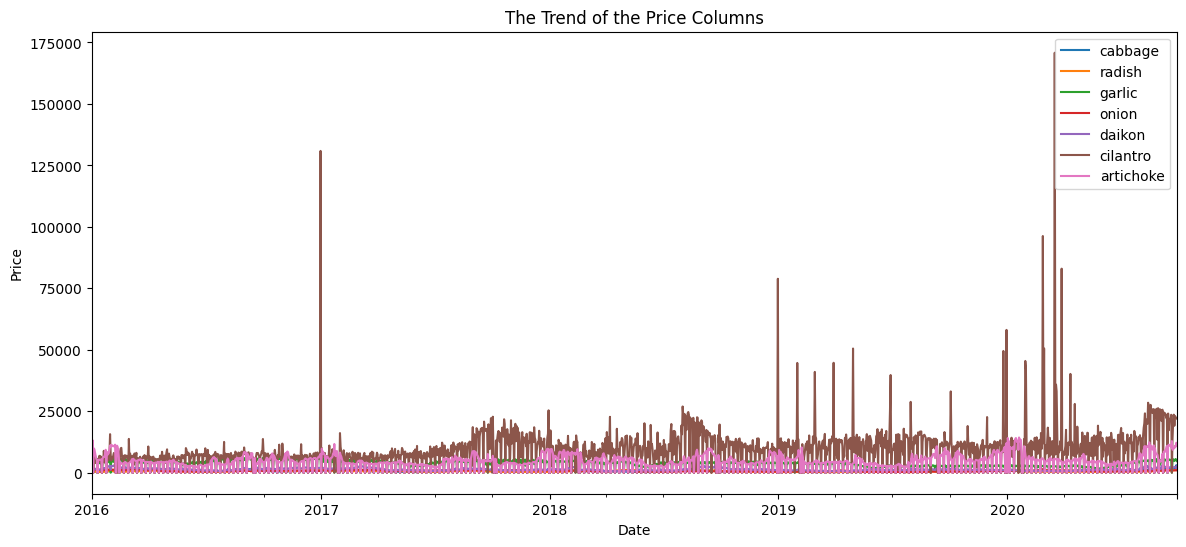

In [35]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# pd dataframe의 index를 날짜 지정해서 시계열 데이터를 시각화
train_data.set_index("date").plot(figsize=(14,6))

plt.title("The Trend of the Price Columns")
plt.xlabel("Date")
plt.ylabel("Price")

In [36]:
def calculate_rolling_mean(data, window=7):
    """
    변동성이 큰 가격을 갖는 품목에 대한 rolling mean 계산
    Args:
        data (pd.DataFrame): DataFrame containing price columns.
        window (int): Window size for rolling mean (default is 7 days).
    Returns:
        pd.DataFrame: DataFrame with rolling mean applied to price columns.
    """
    # Exclude 'date' column from rolling mean calculation
    data_rolling_mean = data.drop(columns=['date']).rolling(window=window, min_periods=1).mean()

    # Merge 'date' column back to the DataFrame
    data_rolling_mean['date'] = data['date']
    return data_rolling_mean

In [37]:
train_data_roll = calculate_rolling_mean(train_data)

In [38]:
train_data_roll.head()

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,date
0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.00,2016-01-01
1,164.500000,180.0,2737.50,640.5,852.0,5500.000000,6621.00,2016-01-02
2,109.666667,120.0,1825.00,427.0,568.0,3666.666667,4414.00,2016-01-03
3,201.750000,185.5,2671.25,629.0,855.0,3866.000000,5791.25,2016-01-04
4,249.800000,232.8,3214.40,745.8,1027.0,3961.200000,6538.80,2016-01-05


Text(0, 0.5, 'Price')

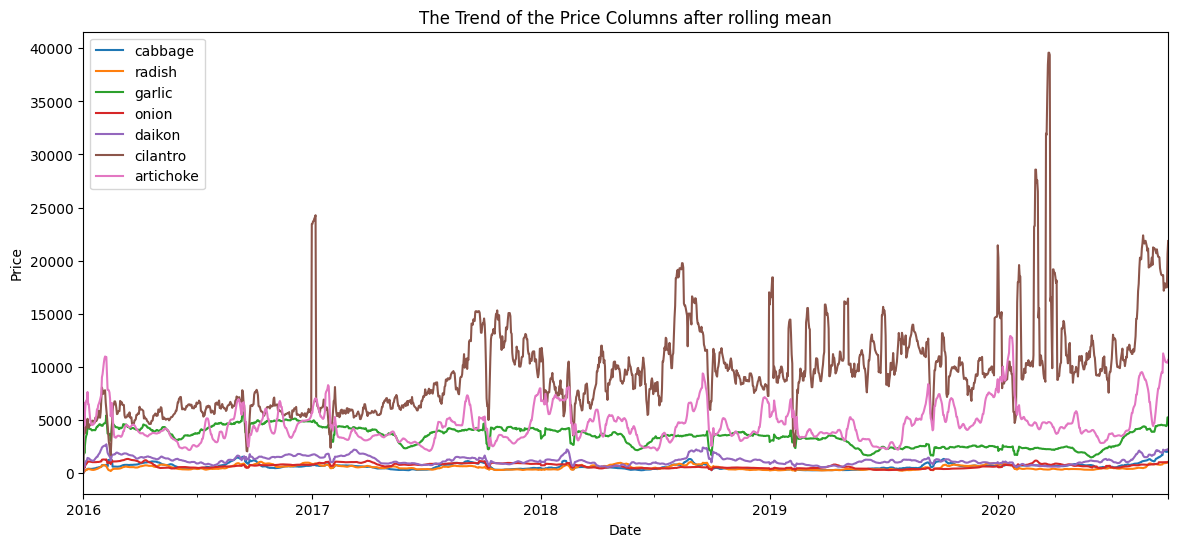

In [39]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

train_data_roll.set_index("date").plot(figsize=(14,6))

plt.title("The Trend of the Price Columns after rolling mean")
plt.xlabel("Date")
plt.ylabel("Price")

In [40]:
# Eng. Note
kor_to_eng = {'date': 'date',
              '배추': 'cabbage',
              '무': 'radish',
              '마늘': 'garlic',
              '양파': 'onion',
              '대파': 'daikon',
              '건고추': 'cilantro',
              '깻잎': 'artichoke'}

- Note
    - 건고추가 가장 가격이 비싼 트렌드. 2020년 초반에 급상승한 히스토리
    - 다음으로 깻잎이 비싸고, 마늘 순으로 가격이 비쌈
    - 건고추가 비싼 이유: https://www.nongmin.com/254253?type=ar_id

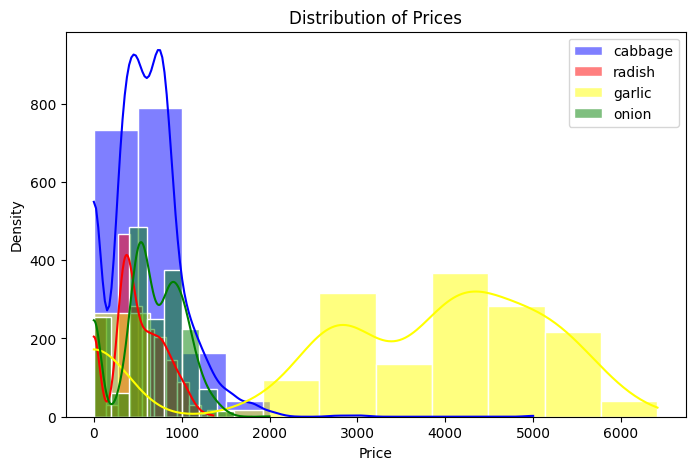

In [41]:
import seaborn as sns

# Set up the matplotlib figure (optional)
plt.figure(figsize=(8, 5))

# Plot using seaborn distplot for each product
sns.histplot(train_data['cabbage'], bins=10, kde=True, label='cabbage', color='blue', edgecolor='white')
sns.histplot(train_data['radish'], bins=10, kde=True, label='radish', color='red', edgecolor='white')
sns.histplot(train_data['garlic'], bins=10, kde=True, label='garlic', color='yellow', edgecolor='white')
sns.histplot(train_data['onion'], bins=10, kde=True, label='onion', color='green', edgecolor='white')

plt.title('Distribution of Prices', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()

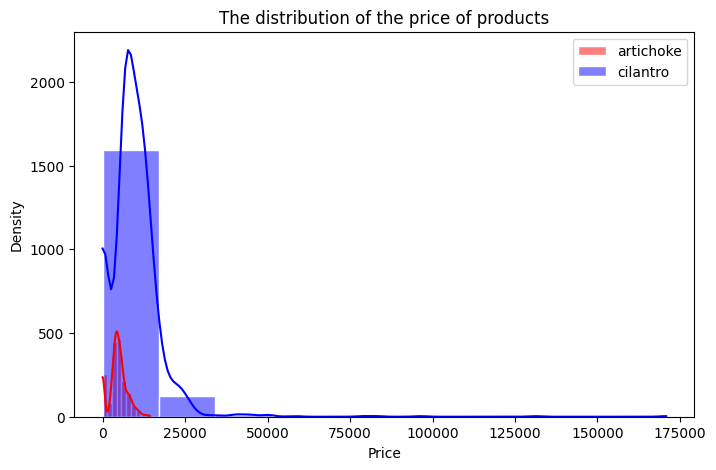

In [42]:
import seaborn as sns

# Set up the matplotlib figure (optional)
plt.figure(figsize=(8, 5))

# Plot using seaborn distplot for each product
sns.histplot(train_data['artichoke'], bins=10, kde=True, label='artichoke', color='red', edgecolor='white')
sns.histplot(train_data['cilantro'], bins=10, kde=True, label='cilantro', color='blue', edgecolor='white')
#sns.histplot(train_data['cilantro'], bins=10, kde=True, label='cilantro', color='blue', edgecolor='white')


plt.title('The distribution of the price of products', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()

In [43]:
# 수치로만 보는 것보다 시각화를 해보는 것이 더 많은 정보를 얻게됨
train_data.drop("date", axis=1).describe().astype(int)

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
count,1733,1733,1733,1733,1733,1733,1733
mean,597,490,3433,652,1160,9537,4614
std,410,299,1751,366,645,8757,2733
min,0,0,0,0,0,0,0
25%,335,324,2687,467,853,6015,3387
50%,577,453,3953,638,1188,8607,4492
75%,805,717,4758,925,1551,12500,5942
max,5000,1360,6415,2000,3182,170836,14326


In [44]:
# 시계열 데이터이므로 날짜의 특성을 고려해서 EDA 진행해보기
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['day'] = train_data['date'].dt.day_of_week
train_data['month'] = train_data['date'].dt.month

# 요일별 평균 가격
price_by_day = train_data.groupby("day")[['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']].mean().round(2)

# 월별 평균 가격
price_by_month = train_data.groupby("month")[['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']].mean().round(2)

In [45]:
price_by_day

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
day,,,,,,,
0,683.44,561.35,3946.44,755.19,1365.35,10929.59,5291.88
1,672.60,568.67,4052.69,752.32,1360.32,10774.06,5313.30
2,686.67,561.73,4043.98,761.73,1330.97,10342.55,5284.68
3,671.24,575.26,3872.85,753.13,1336.74,11484.06,5259.10
4,668.19,563.08,4008.91,742.42,1311.27,10633.57,5291.32
5,699.12,558.24,4009.06,750.63,1321.08,12412.71,5324.81
6,99.55,47.78,107.33,55.50,102.17,203.03,541.68


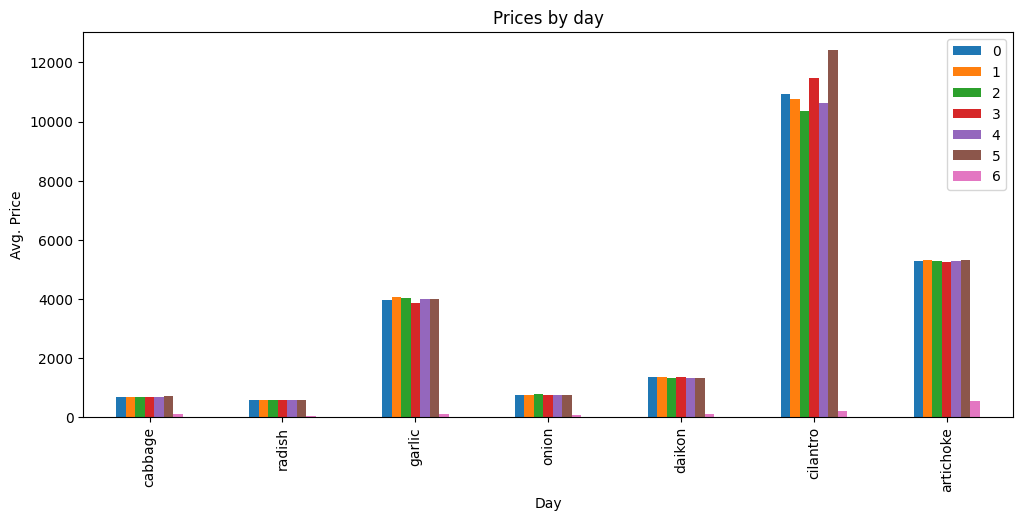

In [46]:
# 요일별 가격의 평균
price_by_day.T.plot(kind='bar', figsize=(12,5))

plt.title('Prices by day')
plt.xlabel('Day')
plt.ylabel('Avg. Price')
plt.legend()
plt.show()

In [47]:
price_by_month

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
month,,,,,,,
1,491.80,459.25,3517.42,746.19,1183.17,7872.32,6692.89
2,617.68,435.96,3550.97,818.74,1271.64,8268.52,4775.11
3,565.03,468.69,3491.91,804.06,1137.14,9508.95,4111.92
4,573.63,481.76,3423.37,703.65,879.39,8636.03,3959.53
5,461.96,476.36,2726.12,552.31,997.29,8415.70,3895.37
6,379.22,373.45,2642.50,498.67,980.92,8669.63,2666.47
7,539.54,385.53,3369.56,510.33,939.57,9109.62,3358.28
8,869.45,569.15,3773.91,622.59,1387.43,12754.94,5543.28
9,1071.39,658.76,3682.44,671.26,1562.33,11991.41,6284.26


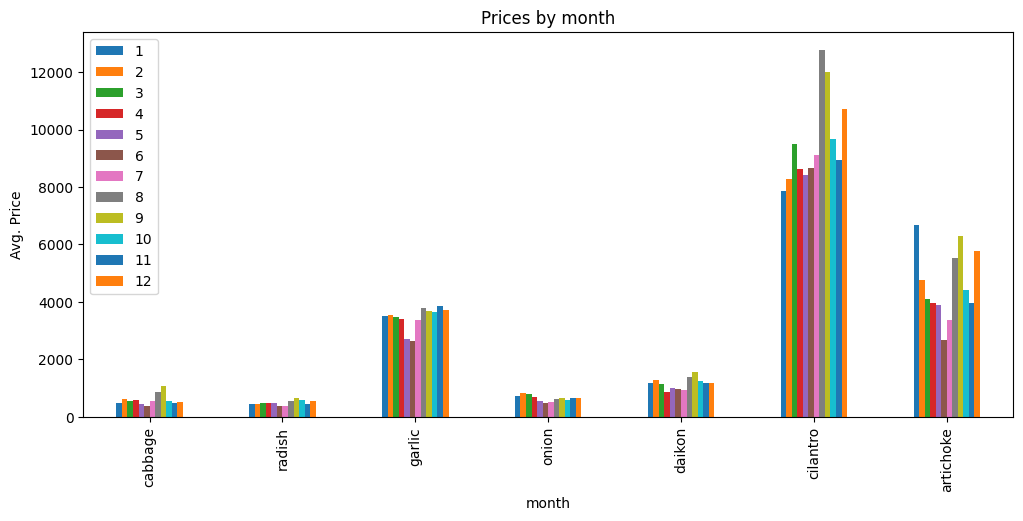

In [48]:
# 월별 평균 가격
price_by_month.T.plot(kind='bar', figsize=(12,5))

plt.title('Prices by month')
plt.xlabel('month')
plt.ylabel('Avg. Price')
plt.legend()
plt.show()

In [49]:
# 품목별 가격의 상관관계
cor_matrix = test_data.corr()[1:].drop('date', axis=1)
cor_matrix.style.background_gradient(cmap='Blues')

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
cabbage,1.000000,0.895434,0.694913,0.626065,0.621212,0.530906,0.635896
radish,0.895434,1.000000,0.716611,0.661243,0.854574,0.583846,0.760584
garlic,0.694913,0.716611,1.000000,0.983797,0.782372,0.913256,0.798740
onion,0.626065,0.661243,0.983797,1.000000,0.770772,0.918222,0.764154
daikon,0.621212,0.854574,0.782372,0.770772,1.000000,0.685111,0.845459
cilantro,0.530906,0.583846,0.913256,0.918222,0.685111,1.000000,0.786033
artichoke,0.635896,0.760584,0.798740,0.764154,0.845459,0.786033,1.000000


- EDA Note
- 상관관계가 높은 품목의 Pair
    - 배추 & 무
    - 무 & 대파
    - 마늘 & 건고추
    - 양파 & 건고추
- 상관관계가 낮은 품목의 Pair
    - 건고추 & 배추
    - 건고추 & 무

# 2강. 베이스라인 모델 구축

- 2강에서는 간단한 시계열 예측모델과 ML 기반 모델을 구축합니다.
- 기본적인 Feature Engineering, 전체적인 모델링 플로우에 대한 개념과 과정을 이해합니다.
- Feature의 중요도와 예측 성능을 확인하는 방법을 이해합니다.
- 모델링 과정은 다양한 피처 엔지니어링과 모델 알고리즘을 반본적으로 적용하고 실험함으로써 베스트 모델을 개발하는 과정을 반복합니다.
- 첫번째 단계로서 베이스라인(기준) 모델을 구축합니다.


## 예측 방법론 개요
- 크게 시계열 알고리즘과 ML 모델(+딥러닝)을 이용한 알고리즘으로 구분
- 시계열 알고리즘
  - 자기상관 y 값을 활용하여 과거 (t-1..t-n) 패턴을 학습하여 미래 예측
  - ML 모델처럼 Feature 정보를 활용하지 않으므로 간편하나
  - 정확도는 ML 모델에 비해 낮은 경향
  - 대표적인 알고리즘으로 [Prophet](https://hyperconnect.github.io/2020/03/09/prophet-package.html), [ARIMA](https://dong-guri.tistory.com/9), [Exponential Smoothing](https://aiemag.tistory.com/260) 등
  - 이번 강의에서는 Prophet 활용하여 시계열 예측모델 구축 예정

- M/L 알고리즘
  - Feature Engineering을 통한 모델 학습 및 예측 수행
  - target y 값을 잘 설명하는 변수를 선정하여 모델 학습시키면 정확도 높은 경향
  - 단, Feature 의 퀄리티에 따라 성능이 영향을 받음
  - 대표적인 알고리즘으로 [Linear Regression, Ridge, Lasso](https://hye-z.tistory.com/22), [Tree-based: Random Forest, LGBM, XGBOOST](https://sikmulation.tistory.com/18), [MLP](https://m.blog.naver.com/samsjang/221030487369) 등


## Prophet

- 페이스북에서 개발한 시계열 기반 예측 알고리즘
- 시계열 예측모델 중에 정확도가 높은 편으로 유명. 다양한 파라메터 제공
- 날짜별 공휴일 정보, 시즈널리티 등 다양한 feature를 추가할수 있어 시계열 예측 모델의 단점을 일부 개선
- 참고: https://hyperconnect.github.io/2020/03/09/prophet-package.html

In [50]:
#!pip install prophet

In [51]:
import logging
import warnings
warnings.filterwarnings('ignore')

from prophet import Prophet
logging.getLogger('prophet').setLevel(logging.WARNING)

In [52]:
# 훈련 데이터셋 생성
train_data = load_data_set(train_file_path, target_prd, kor_to_eng)

# 검증 데이터셋 생성
test_data = load_data_set(test_file_path, target_prd, kor_to_eng)

loaded successfully
        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
loaded successfully
        date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0


In [53]:
train_data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0
...,...,...,...,...,...,...,...,...
1728,2020-09-24,1839.0,990.0,4775.0,990.0,2380.0,19101.0,10028.0
1729,2020-09-25,1789.0,1011.0,5039.0,955.0,2239.0,23095.0,10921.0
1730,2020-09-26,1760.0,1075.0,5565.0,961.0,2126.0,22510.0,10607.0
1731,2020-09-27,3066.0,1139.0,5227.0,1056.0,1866.0,22333.0,12195.0


In [54]:
# 예측 대상 df 생성
start_dt = '2020-09-29' # 예측 시작일
end_dt = '2020-11-04' # 예측 마지막일

forecast_df = pd.DataFrame({'date': pd.date_range(start=start_dt, end=end_dt)})
#forecast_df

In [55]:
import holidays

kr_holidays = holidays.KR(years=[2016, 2017, 2018, 2019, 2020])
holidays_df = pd.DataFrame(list(kr_holidays.items()), columns=['ds', 'holiday'])
holidays_df['lower_window'] = 0
holidays_df['upper_window'] = 1
holidays_df

,ds,holiday,lower_window,upper_window
0,2016-01-01,New Year's Day,0,1
1,2016-02-08,Korean New Year,0,1
2,2016-02-07,The day preceding Korean New Year,0,1
3,2016-02-09,The second day of Korean New Year,0,1
4,2016-03-01,Independence Movement Day,0,1
...,...,...,...,...
83,2020-10-02,The second day of Chuseok,0,1
84,2020-12-25,Christmas Day,0,1
85,2020-04-15,National Assembly Election Day,0,1
86,2020-01-27,Alternative holiday for Korean New Year,0,1


In [56]:
train_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0


In [57]:
# 품목별 반복하면서 예측후 저장
for col in train_data.columns:
    if col != 'date':
        train_prophet = train_data[['date', col]].rename(columns={'date': 'ds', col: 'y'})

        model_prophet = Prophet(holidays=holidays_df)
        model_prophet.fit(train_prophet)

        future_dates = pd.DataFrame(pd.date_range(start=start_dt, end=end_dt), columns=['ds'])
        forecast = model_prophet.predict(future_dates)
        forecast = forecast.round(2)

        forecast_df[col+'_pred'] = forecast['yhat']

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcxflfnem/nvprr86h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcxflfnem/pwzmi43h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48440', 'data', 'file=/tmp/tmpcxflfnem/nvprr86h.json', 'init=/tmp/tmpcxflfnem/pwzmi43h.json', 'output', 'file=/tmp/tmpcxflfnem/prophet_model2jfwfhqd/prophet_model-20240910052448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:24:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:24:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcxflfnem/cbtfusql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcxflfnem/yhyg_sp8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [58]:
forecast_df.head()

,date,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred
0,2020-09-29,1478.61,828.77,4709.09,1021.64,1953.22,17436.86,8106.61
1,2020-09-30,1686.31,1007.64,5069.04,1235.51,2306.33,9096.02,7859.16
2,2020-10-01,274.87,76.14,232.58,330.21,55.03,4456.61,624.45
3,2020-10-02,305.09,89.73,272.15,245.51,120.32,3878.44,1043.18
4,2020-10-03,1553.56,918.77,5062.94,1018.12,2381.20,15509.56,4268.81


In [59]:
forecast_df.tail()

,date,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred
32,2020-10-31,956.00,628.40,4807.08,1017.85,1563.27,18362.53,6693.37
33,2020-11-01,356.17,113.05,898.29,321.51,341.96,6129.51,1866.72
34,2020-11-02,944.33,630.70,4781.40,1025.30,1624.77,16709.85,6600.25
35,2020-11-03,954.39,634.44,4896.90,1031.08,1624.08,16574.10,6612.21
36,2020-11-04,973.51,630.31,4924.14,1043.84,1607.20,16098.79,6591.89


In [60]:
test_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0
1,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0


In [61]:
# 실제 값과 조인
test = test_data.merge(forecast_df, on=['date'], how='left')

In [62]:
test.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred
0,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,1478.61,828.77,4709.09,1021.64,1953.22,17436.86,8106.61
1,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,1686.31,1007.64,5069.04,1235.51,2306.33,9096.02,7859.16
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274.87,76.14,232.58,330.21,55.03,4456.61,624.45
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,305.09,89.73,272.15,245.51,120.32,3878.44,1043.18
4,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,1553.56,918.77,5062.94,1018.12,2381.20,15509.56,4268.81


In [63]:
# 품목별로 실제, 예측값만 저장
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
dfs = {}
for p in prd:
    dfs[p] = test[['date', p, p+'_pred']]

In [64]:
print("DataFrame for 'cabbage':")
print(dfs['cabbage'].head())

DataFrame for 'cabbage':
        date  cabbage  cabbage_pred
0 2020-09-29   1787.0       1478.61
1 2020-09-30   1551.0       1686.31
2 2020-10-01      0.0        274.87
3 2020-10-02      0.0        305.09
4 2020-10-03      0.0       1553.56


In [65]:
#dfs['garlic']

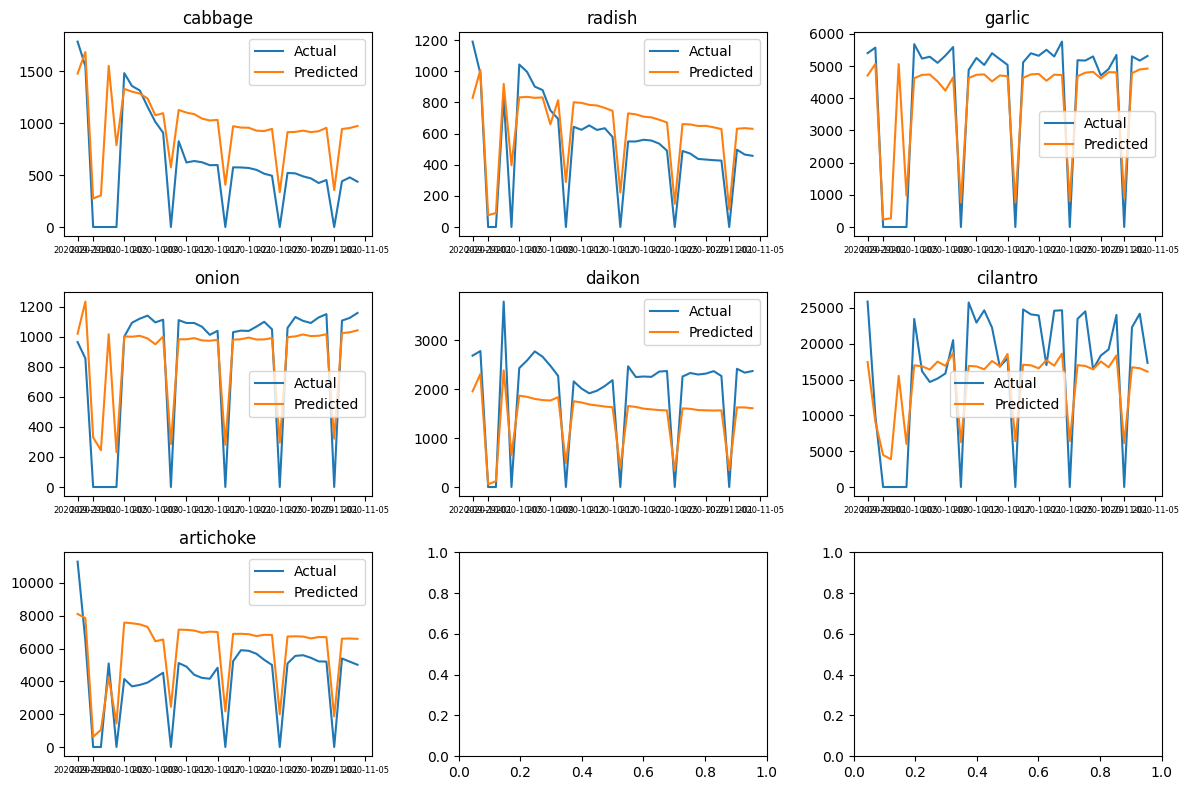

In [66]:
# 품목별 예측값 vs 실제값 시각화
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()

for i, (prd, ax) in enumerate(zip(['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke'], axes)):
    df = dfs[prd]
    ax.plot(df['date'], df[prd], label='Actual')
    ax.plot(df['date'], df[prd+'_pred'], label='Predicted')
    ax.set_title(prd)
    ax.legend()
    ax.tick_params(axis='x', labelsize=6)

plt.tight_layout()
plt.show()

- Note
    - 성능 지표 선정: MdAPE (Median Absoulte Percentage Error)
    - 실제값 대비 절대값 오차의 비율로 오차율을 구한후 1에서 빼서 정확도를 표현
    - 0~1 사이의 값을 가지므로 스케일에 영향받지 않아 비교가 용이
    - 단 실제값이 너무 작을 경우(분모) 수치 변동성이 큼

In [67]:
# 품목별로 실제, 예측값만 저장
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
dfs = {}
for p in prd:
    dfs[p] = test[['date', p, p+'_pred']]

for p in prd:
    dfs[p]['gap'] = (dfs[p][p] - dfs[p][p + '_pred'])
    dfs[p]['abs_gap'] = abs(dfs[p][p] - dfs[p][p + '_pred'])
    dfs[p]['ape'] = dfs[p]['abs_gap'] / dfs[p][p]
    dfs[p]['ape_median'] = 1-(dfs[p]['ape'].median())

In [68]:
for p in prd:
    print(f"{p}: APE Median = {dfs[p]['ape_median'][0]}")

cabbage: APE Median = 0.22713826366559486
radish: APE Median = 0.6964453781512605
garlic: APE Median = 0.8940248027057497
onion: APE Median = 0.8998620689655171
daikon: APE Median = 0.6855865921787709
cilantro: APE Median = 0.7249942462600691
artichoke: APE Median = 0.6019741985926506


In [69]:
# postprocessing
# 비즈니스 로직이나 패턴 등을 이해하여 임의의 예측 값으로 변형: 일요일은 0 으로 예측값을 일괄 적용
price_by_day

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
day,,,,,,,
0,683.44,561.35,3946.44,755.19,1365.35,10929.59,5291.88
1,672.60,568.67,4052.69,752.32,1360.32,10774.06,5313.30
2,686.67,561.73,4043.98,761.73,1330.97,10342.55,5284.68
3,671.24,575.26,3872.85,753.13,1336.74,11484.06,5259.10
4,668.19,563.08,4008.91,742.42,1311.27,10633.57,5291.32
5,699.12,558.24,4009.06,750.63,1321.08,12412.71,5324.81
6,99.55,47.78,107.33,55.50,102.17,203.03,541.68


In [70]:
test.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred
0,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,1478.61,828.77,4709.09,1021.64,1953.22,17436.86,8106.61
1,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,1686.31,1007.64,5069.04,1235.51,2306.33,9096.02,7859.16
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274.87,76.14,232.58,330.21,55.03,4456.61,624.45
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,305.09,89.73,272.15,245.51,120.32,3878.44,1043.18
4,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,1553.56,918.77,5062.94,1018.12,2381.20,15509.56,4268.81


In [71]:
test_post = test.copy()

# 요일
test_post['day'] = test_post['date'].dt.day_of_week

# 공휴일 지정
holidays = ['2020-10-01', '2020-10-03']
test_post['holiday'] = test_post['date'].isin(holidays).astype(int)

# 일요일이거나 공휴일인 경우 1 아니면 0
test_post['is_flag'] = np.where((test_post['day'] == 6) | (test_post['holiday'] == 1), 1, 0)

In [72]:
# 공휴일이거나 일요일인 경우 예측값을 0으로 치환
# 휴일은 거래 자체가 closed 가능성 높음. 결국 사람이 거래를 하는데 휴일에는 휴식 필요.
for p in prd:
    test_post[p+'_pred'] = np.where(test_post['is_flag'] == 0, test_post[p+'_pred'], 0)

In [73]:
test_post.head(7)

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred,day,holiday,is_flag
0,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,1478.61,828.77,4709.09,1021.64,1953.22,17436.86,8106.61,1,0,0
1,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,1686.31,1007.64,5069.04,1235.51,2306.33,9096.02,7859.16,2,0,0
2,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,1,1
3,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,305.09,89.73,272.15,245.51,120.32,3878.44,1043.18,4,0,0
4,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5,1,1
5,2020-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6,0,1
6,2020-10-05,1483.0,1043.0,5683.0,1002.0,2427.0,23450.0,4142.0,1331.09,832.01,4624.78,1002.93,1865.03,16980.70,7581.39,0,0,0


In [74]:
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

dfs_post = {}
for p in prd:
    dfs_post[p] = test_post[['date', p, p+'_pred']]

print("DataFrame for 'cabbage':")
print(dfs_post['cabbage'].head(10))

DataFrame for 'cabbage':
        date  cabbage  cabbage_pred
0 2020-09-29   1787.0       1478.61
1 2020-09-30   1551.0       1686.31
2 2020-10-01      0.0          0.00
3 2020-10-02      0.0        305.09
4 2020-10-03      0.0          0.00
5 2020-10-04      0.0          0.00
6 2020-10-05   1483.0       1331.09
7 2020-10-06   1359.0       1304.53
8 2020-10-07   1316.0       1286.10
9 2020-10-08   1159.0       1238.50


In [75]:
print(dfs['garlic'].head(10))

        date  garlic  garlic_pred      gap  abs_gap       ape  ape_median
0 2020-09-29  5404.0      4709.09   694.91   694.91  0.128592    0.894025
1 2020-09-30  5575.0      5069.04   505.96   505.96  0.090755    0.894025
2 2020-10-01     0.0       232.58  -232.58   232.58       inf    0.894025
3 2020-10-02     0.0       272.15  -272.15   272.15       inf    0.894025
4 2020-10-03     0.0      5062.94 -5062.94  5062.94       inf    0.894025
5 2020-10-04     0.0       978.26  -978.26   978.26       inf    0.894025
6 2020-10-05  5683.0      4624.78  1058.22  1058.22  0.186208    0.894025
7 2020-10-06  5235.0      4726.63   508.37   508.37  0.097110    0.894025
8 2020-10-07  5292.0      4740.11   551.89   551.89  0.104288    0.894025
9 2020-10-08  5102.0      4523.04   578.96   578.96  0.113477    0.894025


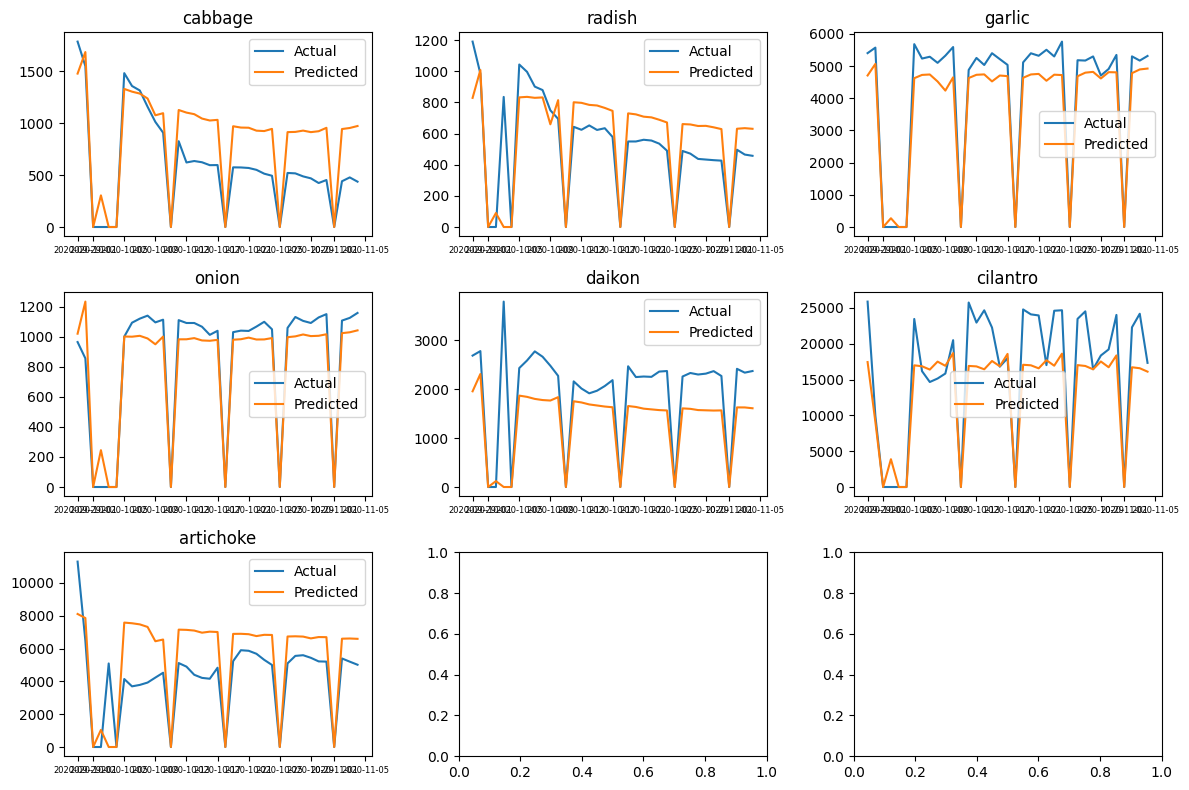

In [76]:
# 품목별 예측값 vs 실제값 시각화
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()

for i, (prd, ax) in enumerate(zip(['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke'], axes)):
    df = dfs_post[prd]
    ax.plot(df['date'], df[prd], label='Actual')
    ax.plot(df['date'], df[prd+'_pred'], label='Predicted')
    ax.set_title(prd)
    ax.legend()
    ax.tick_params(axis='x', labelsize=6)

plt.tight_layout()
plt.show()

In [77]:
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

for p in prd:
    dfs_post[p]['gap'] = (dfs_post[p][p] - dfs_post[p][p + '_pred'])
    dfs_post[p]['abs_gap'] = abs(dfs_post[p][p] - dfs_post[p][p + '_pred'])
    dfs_post[p]['ape'] = dfs_post[p]['abs_gap'] / dfs_post[p][p]
    dfs_post[p]['ape_median'] = 1-(dfs_post[p]['ape'].median())

In [78]:
# with postprocessing
for p in prd:
    print(f"{p}: APE Median = {dfs_post[p]['ape_median'][0]}")

cabbage: APE Median = 0.2837211915917437
radish: APE Median = 0.7132149532710281
garlic: APE Median = 0.9010030083308562
onion: APE Median = 0.9146447975988918
daikon: APE Median = 0.7047686832740213
cilantro: APE Median = 0.7596517062278811
artichoke: APE Median = 0.6787009419152277


In [79]:
# without post-processing
for p in prd:
    print(f"{p}: APE Median = {dfs[p]['ape_median'][0]}")

cabbage: APE Median = 0.22713826366559486
radish: APE Median = 0.6964453781512605
garlic: APE Median = 0.8940248027057497
onion: APE Median = 0.8998620689655171
daikon: APE Median = 0.6855865921787709
cilantro: APE Median = 0.7249942462600691
artichoke: APE Median = 0.6019741985926506


- Note
- Prophet 알고리즘을 이용한 성능 확인 완료
- Post-processing은 효과가 있으므로 필수적으로 진행 필요


## Feature Engineering for ML
- 모델링의 성능을 좌우하는 가장 중요한 요인이 Feature 입니다.
- Feature 즉 모델의 Input을 어떻게 변형하여 넣어주는지에 따라 모델 성능에 영향을 줍니다.
- 시계열 데이터셋에서 기본적인 Feature는 날짜, 시점과 관련된 feature입니다.
- 예를 들어, 2024-01-01 이라는 날짜가 있을때 이를 요일, 월, 연, 분기, 반기, 주말/주중으로 변환하여 feature 로 활용하는 것입니다.
- 위와 같은 시점 관련 정보는 target value (여기에서는 품목별 가격)에 대한 많은 정보를 담고 있습니다.


In [80]:
# 훈련 데이터셋 생성
train_data = load_data_set(train_file_path, target_prd, kor_to_eng)

# 검증 데이터셋 생성
test_data = load_data_set(test_file_path, target_prd, kor_to_eng)

loaded successfully
        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
loaded successfully
        date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0


In [81]:
# 편의를 위해 학습 + 테스트셋 합치기
data = pd.concat([train_data, test_data]).reset_index(drop=True)

print(data.head())
print(data.tail())

        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
           date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
1765 2020-10-31    453.0   426.0  5348.0  1152.0  2265.0   24013.0     5204.0
1766 2020-11-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1767 2020-11-02    441.0   496.0  5303.0  1109.0  2412.0   22287.0     5395.0
1768 2020-11-03    478.0   465.0  5172.0  1127.0  2334.0   24178.0     5201.0
1769 2020-11-04    437.0   457.0  5316.0  1160.0  2367.0   17324.0     5013.0


In [82]:
data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0
...,...,...,...,...,...,...,...,...
1765,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0
1766,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1767,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0
1768,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0


In [83]:
import holidays

def add_date_features(data):
    """
    dataset 에 날짜 관련된 피처를 생성
    args:
        dataset
    return:
        features 포함된 dataset
    """
    # 날짜 기반 파생변수 생성
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['day_of_week'] = data['date'].dt.dayofweek
    data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

    # 공휴일 변수
    kr_holidays = holidays.KR(years=data['year'].unique())
    data['is_holiday'] = data['date'].isin(kr_holidays).astype(int)

    return data

In [84]:
data = add_date_features(data)

In [85]:
data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,day,day_of_week,is_weekend,is_holiday
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,1,4,0,1
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0,2016,1,2,5,1,0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,3,6,1,0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0,2016,1,4,0,0,0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0,2016,1,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0,2020,10,31,5,1,0
1766,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,11,1,6,1,0
1767,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0,2020,11,2,0,0,0
1768,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0,2020,11,3,1,0,0


- Note
    - 날짜 관련 피처와 더불어 가장 많이 활용되고 강력한 피처는 자기상관 값입니다.
    - 마치 Prophet 과 같은 시계열 모델이 자기상관 y 값을 가지고 모델링하듯이
    - 이를 ML 모델의 Feature로 넣어주어 학습시키는 방법이며 효과가 좋습니다.

In [86]:
def add_lagging_features(data, window=7):
    """
    예측값의 과거 t-1, .. t-n 까지의 데이터를 추가
    args:
        dataset,
        window=7 as default
    return:
        features 포함된 dataset
    """
    data = data.copy()

    products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
    for product in products:
        data[f'{product}_lag_{window}'] = data[product].shift(window)
    return data

In [87]:
data = add_lagging_features(data, window=7)
data = add_lagging_features(data, window=14)

In [88]:
data.head(10)

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,daikon_lag_7,cilantro_lag_7,artichoke_lag_7,cabbage_lag_14,radish_lag_14,garlic_lag_14,onion_lag_14,daikon_lag_14,cilantro_lag_14,artichoke_lag_14
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-06,442.0,409.0,5013.0,1263.0,1620.0,7041.0,8123.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-07,448.0,428.0,4360.0,1241.0,1545.0,3908.0,6793.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-08,420.0,390.0,4850.0,1218.0,1488.0,4836.0,5644.0,2016,1,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-09,389.0,345.0,4527.0,1210.0,1433.0,5112.0,5128.0,2016,1,...,1704.0,11000.0,13242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
def add_rolling_mean(data, window=7):
    """
    변동성이 큰 가격을 갖는 품목에 대한 rolling mean 계산
    args:
        dataset,
        window=7 as default
    return:
        features 포함된 dataset
    """
    products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

    for product in products:
        data[f'{product}_rolling_mean'] = data[product].rolling(window=window).mean()
        data[f'{product}_rolling_std'] = data[product].rolling(window=window).std()

    return data

In [90]:
data = add_rolling_mean(data)

In [91]:
#data

In [92]:
def split_data(data, std_date='2020-09-29'):
    """
    특정 날짜 기준으로 train, test dataset 나누기
    args:
        dataset
    return:
        train, test dataset
    """
    data = data.dropna()
    train_data = data.query("date < @std_date")
    test_data = data.query("date >= @std_date")

    print("Train set shape:", train_data.shape)
    print("Test set shape:", test_data.shape)
    return train_data, test_data

In [93]:
train_data, test_data = split_data(data)

Train set shape: (1719, 42)
Test set shape: (37, 42)


In [94]:
train_data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
14,2016-01-15,449.0,307.0,4394.0,1146.0,1335.0,6643.0,5251.0,2016,1,...,3983.571429,1819.263299,1006.571429,444.732076,1148.000000,508.796947,4884.857143,2321.180621,4492.142857,1981.663395
15,2016-01-16,454.0,306.0,4728.0,1150.0,1339.0,5246.0,5391.0,2016,1,...,4012.285714,1830.819554,998.000000,440.717975,1134.571429,501.205167,4904.000000,2323.917024,4529.714286,1998.152790
16,2016-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,4012.285714,1830.819554,998.000000,440.717975,1134.571429,501.205167,4904.000000,2323.917024,4529.714286,1998.152790
17,2016-01-18,475.0,344.0,5066.0,1176.0,1403.0,5161.0,5707.0,2016,1,...,4028.000000,1840.714988,992.428571,437.754062,1146.000000,507.095323,4825.285714,2301.208213,4599.571429,2034.444712
18,2016-01-19,511.0,407.0,5088.0,1176.0,1777.0,4441.0,6285.0,2016,1,...,4028.714286,1841.193518,994.571429,438.752344,1211.142857,559.866778,4674.285714,2284.326284,4745.571429,2124.661217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2020-09-24,1839.0,990.0,4775.0,990.0,2380.0,19101.0,10028.0,2020,9,...,4421.142857,1963.211945,994.857143,34.387152,2140.857143,133.913440,17450.285714,8401.309733,10425.857143,1213.752779
1729,2020-09-25,1789.0,1011.0,5039.0,955.0,2239.0,23095.0,10921.0,2020,9,...,4392.285714,1950.596466,994.000000,35.430684,2166.571429,132.853123,17623.000000,8519.296313,10401.428571,1199.751204
1730,2020-09-26,1760.0,1075.0,5565.0,961.0,2126.0,22510.0,10607.0,2020,9,...,4472.571429,1991.068629,991.857143,37.114366,2178.000000,123.891081,17472.571429,8405.466730,10461.571429,1197.702503
1731,2020-09-27,3066.0,1139.0,5227.0,1056.0,1866.0,22333.0,12195.0,2020,9,...,5219.285714,273.348809,990.142857,33.067752,2127.714286,168.393106,20663.000000,3439.777076,10366.142857,981.590279


In [95]:
test_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,5155.571429,310.760281,982.142857,34.858899,2303.285714,282.917370,22649.000000,2025.475335,10881.428571,778.741904
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,5191.714286,346.051400,964.142857,58.712374,2383.000000,329.070914,20694.714286,5143.887528,10384.142857,1846.655303
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,4509.571429,2010.038296,822.714286,367.326247,2043.000000,959.097319,17966.000000,9419.550379,8951.571429,4355.046378
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,3789.714286,2603.526564,686.285714,472.341936,1723.142857,1220.551710,14666.714286,11200.008091,7391.428571,5369.857784
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,2994.714286,2812.360320,549.000000,516.757519,1960.000000,1450.896734,11451.000000,11788.771041,6603.428571,5222.031848


In [96]:
test_data.tail()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
1765,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0,2020,10,...,4375.000000,1942.239086,953.571429,421.564885,1974.571429,871.501550,17997.428571,8528.878411,4585.428571,2030.664904
1766,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,11,...,4375.000000,1942.239086,953.571429,421.564885,1974.571429,871.501550,17997.428571,8528.878411,4585.428571,2030.664904
1767,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0,2020,11,...,4392.142857,1951.068889,960.571429,424.026280,1997.000000,881.879810,17829.428571,8414.085271,4628.142857,2046.279178
1768,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0,2020,11,...,4392.000000,1951.002221,959.714286,423.625508,1998.000000,882.320237,17781.428571,8370.441264,4578.000000,2024.047266
1769,2020-11-04,437.0,457.0,5316.0,1160.0,2367.0,17324.0,5013.0,2020,11,...,4394.142857,1952.174892,967.285714,427.155598,2008.142857,886.714052,17908.285714,8353.363947,4495.000000,1987.014092


## ML 모델 구축 및 성능 비교

In [97]:
#pip install xgboost

In [98]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [99]:
train_data.columns

Index(['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro',
       'artichoke', 'year', 'month', 'day', 'day_of_week', 'is_weekend',
       'is_holiday', 'cabbage_lag_7', 'radish_lag_7', 'garlic_lag_7',
       'onion_lag_7', 'daikon_lag_7', 'cilantro_lag_7', 'artichoke_lag_7',
       'cabbage_lag_14', 'radish_lag_14', 'garlic_lag_14', 'onion_lag_14',
       'daikon_lag_14', 'cilantro_lag_14', 'artichoke_lag_14',
       'cabbage_rolling_mean', 'cabbage_rolling_std', 'radish_rolling_mean',
       'radish_rolling_std', 'garlic_rolling_mean', 'garlic_rolling_std',
       'onion_rolling_mean', 'onion_rolling_std', 'daikon_rolling_mean',
       'daikon_rolling_std', 'cilantro_rolling_mean', 'cilantro_rolling_std',
       'artichoke_rolling_mean', 'artichoke_rolling_std'],
      dtype='object')

In [100]:
# 예측 대상 품목 리스트
products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

# Define the target and features
features = ['year', 'month', 'day', 'day_of_week', 'is_weekend', 'is_holiday'] + \
           [f'{product}_lag_7' for product in products] + \
           [f'{product}_lag_14' for product in products] + \
           [f'{product}_rolling_mean' for product in products] + \
           [f'{product}_rolling_std' for product in products]

targets = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

In [101]:
#features

In [102]:
train_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
14,2016-01-15,449.0,307.0,4394.0,1146.0,1335.0,6643.0,5251.0,2016,1,...,3983.571429,1819.263299,1006.571429,444.732076,1148.000000,508.796947,4884.857143,2321.180621,4492.142857,1981.663395
15,2016-01-16,454.0,306.0,4728.0,1150.0,1339.0,5246.0,5391.0,2016,1,...,4012.285714,1830.819554,998.000000,440.717975,1134.571429,501.205167,4904.000000,2323.917024,4529.714286,1998.152790
16,2016-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,4012.285714,1830.819554,998.000000,440.717975,1134.571429,501.205167,4904.000000,2323.917024,4529.714286,1998.152790
17,2016-01-18,475.0,344.0,5066.0,1176.0,1403.0,5161.0,5707.0,2016,1,...,4028.000000,1840.714988,992.428571,437.754062,1146.000000,507.095323,4825.285714,2301.208213,4599.571429,2034.444712
18,2016-01-19,511.0,407.0,5088.0,1176.0,1777.0,4441.0,6285.0,2016,1,...,4028.714286,1841.193518,994.571429,438.752344,1211.142857,559.866778,4674.285714,2284.326284,4745.571429,2124.661217


In [103]:
# 모델 선언: 계속해서 다른 모델도 추가 가능
models = {
    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'MLP': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
}

def train_models(train_data, targets, features, models):
    """
    학습 데이터셋을 받아서 모델별로 반복하여 학습 진행하고 예측값 반환
    args:
        train_data,
        targets,
        features,
        models
    return:
        predictions
    """
    predictions = {model_name: {} for model_name in models}
    for model_name, model in models.items():
        for target in targets:
            model.fit(train_data[features], train_data[target])
            predictions[model_name][target] = model.predict(test_data[features])
    return predictions

In [104]:
predictions = train_models(train_data, targets, features, models)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 599.280396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 492.411867
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train s

In [105]:
predictions

{'Ridge': {'cabbage': array([2325.38158538, 2151.05164051, 1778.77710296, 1500.6520821 ,
         1217.60625779,  864.62684014,  987.94693262,  919.54367958,
          757.25002659,  237.41574035,  285.81442274,  931.52858901,
          612.94599123, 1199.99669111, 1160.45230724, 1065.12614832,
          726.46829958,  597.5479715 ,  365.64602412,   16.03703068,
          787.87268489,  677.47971049,  680.08507546,  637.83471589,
          633.83933319,  629.66211594,  -46.1711671 ,  636.28916424,
          630.8813805 ,  611.07546373,  607.20931341,  586.72219841,
          513.72268928,  -71.95563132,  579.20891928,  602.49861479,
          550.39729897]),
  'radish': array([1293.54879044, 1148.61851687,  942.76892162,  816.23411061,
          742.14176535,  686.00701801,  815.68004653,  797.85670549,
          710.34755419,  324.96111694,  278.50307639,  657.7299009 ,
          425.83225779,  946.71325549,  906.02636508,  844.50046274,
          532.4334373 ,  475.21153134,  440.403

In [106]:
predictions['LGBM']['onion']

array([ 922.65625067,  928.12943346,  660.48043965,  319.57355106,
        188.6157825 ,  339.12872439,  818.37232228,  926.83773449,
        963.75119256,  979.39721962,  817.96252382,  882.36869629,
        -46.64847414,  986.47193495, 1015.96775673, 1078.6758735 ,
       1076.40336887, 1020.40147358,  985.64498685,   41.4053009 ,
        975.5440814 , 1025.99864481,  988.57595541,  995.92394404,
       1024.26654128, 1000.95528986,   10.7452048 , 1004.16684765,
       1008.03082367, 1006.62684908, 1031.08044021, 1068.39688231,
       1096.68229573,   30.86361132, 1100.08155403, 1064.46729874,
       1095.86699604])

In [107]:
predictions['MLP']['cabbage']

array([2263.64577831, 1930.87419491, 1898.98476609, 1259.13611394,
       1057.20459973,  903.55714729,  757.66520681, 1109.6830997 ,
        868.12645658, 1135.38966575, 1437.07815896, 1096.402282  ,
       1195.77201269, 1039.25174154,  891.02422459,  760.50602893,
        972.5139935 ,  890.56154604,  556.36977803,   76.10619415,
        679.56804544,  634.80178593,  652.81990069,  577.87537874,
        677.61404989,  700.14307413,   82.03969193,  639.11552399,
        501.11195034,  524.66293999,  547.6746236 ,  422.32337638,
        384.87305915,   76.26098626,  517.94312351,  519.33750849,
        476.42004094])

In [108]:
test_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,5155.571429,310.760281,982.142857,34.858899,2303.285714,282.917370,22649.000000,2025.475335,10881.428571,778.741904
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,5191.714286,346.051400,964.142857,58.712374,2383.000000,329.070914,20694.714286,5143.887528,10384.142857,1846.655303
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,4509.571429,2010.038296,822.714286,367.326247,2043.000000,959.097319,17966.000000,9419.550379,8951.571429,4355.046378
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,3789.714286,2603.526564,686.285714,472.341936,1723.142857,1220.551710,14666.714286,11200.008091,7391.428571,5369.857784
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,2994.714286,2812.360320,549.000000,516.757519,1960.000000,1450.896734,11451.000000,11788.771041,6603.428571,5222.031848


In [109]:
def create_predictions_df(test_data, predictions, targets):
    """
    테스트셋에 대한 예측값을 데이터프레임으로 생성
    args:
        test_data,
        predictions,
        targets
    return:
        test_data_predictions
    """
    # 예측값을 데이터프레임으로 변환
    test_data_predictions = test_data.copy()
    for model_name, model_preds in predictions.items():
        for target in targets:
            test_data_predictions[f'{target}_pred_{model_name}'] = model_preds[target]
    return test_data_predictions

In [110]:
test_data_predictions = create_predictions_df(test_data, predictions, targets)

In [111]:
test_data_predictions.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,daikon_pred_XGBoost,cilantro_pred_XGBoost,artichoke_pred_XGBoost,cabbage_pred_MLP,radish_pred_MLP,garlic_pred_MLP,onion_pred_MLP,daikon_pred_MLP,cilantro_pred_MLP,artichoke_pred_MLP
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,2384.419434,19619.980469,11263.524414,2263.645778,1141.198634,6477.417382,1386.628779,2923.348945,24666.076097,11856.588873
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,1531.583740,19510.753906,7996.165039,1930.874195,1175.675713,6027.528623,1123.568996,2735.713628,21336.557954,12092.446694
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,1070.571045,20249.416016,4764.882812,1898.984766,1083.852045,4770.419512,1002.424949,2217.724454,19159.175061,10490.152097
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,1345.245850,17482.580078,5095.951660,1259.136114,923.747248,3886.912624,867.546370,1474.571618,15050.454592,7636.550552
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,1099.464966,5635.312500,4023.462402,1057.204600,781.897597,3377.316913,790.928273,1668.606034,12010.843583,6383.486289


In [112]:
def evaluate_predictions(test_data_predictions, targets):
    """
    테스트셋에 대한 예측값을 평가
    args:
        test_data_predictions,
        targets
    return:
    """
    MdAPEs = {}
    for target in targets:
        for model_name in test_data_predictions.columns:
            if target+'_pred_' in model_name:
                APE_col = f'{target}_APE_{model_name.split("_")[2]}'
                test_data_predictions[APE_col] = np.abs((test_data_predictions[target] - test_data_predictions[model_name]) / test_data_predictions[target])
                MdAPE = test_data_predictions[APE_col].median()
                MdAPEs[f'{target}_{model_name.split("_")[2]}'] = 1 - round(MdAPE, 6)

    return pd.DataFrame(list(MdAPEs.items()), columns=['product_model', 'MdAPE'])

In [113]:
metrics = evaluate_predictions(test_data_predictions, targets)
metrics[['product', 'model']] = metrics['product_model'].str.split('_', expand=True)

In [114]:
metrics

,product_model,MdAPE,product,model
0,cabbage_Ridge,0.666181,cabbage,Ridge
1,cabbage_RandomForest,0.871410,cabbage,RandomForest
2,cabbage_LGBM,0.802795,cabbage,LGBM
3,cabbage_XGBoost,0.794851,cabbage,XGBoost
4,cabbage_MLP,0.755078,cabbage,MLP
5,radish_Ridge,0.788399,radish,Ridge
6,radish_RandomForest,0.918529,radish,RandomForest
7,radish_LGBM,0.862798,radish,LGBM
8,radish_XGBoost,0.891420,radish,XGBoost
9,radish_MLP,0.817303,radish,MLP


In [115]:
# Visualize predictions
def plot_predictions(test_data_predictions, targets):
    num_rows = 3
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
    axes = axes.flatten()

    for i, target in enumerate(targets):
        ax = axes[i]
        ax.plot(test_data_predictions['date'], test_data_predictions[target], label='Actual')
        for model_name in models.keys():
            ax.plot(test_data_predictions['date'], test_data_predictions[f'{target}_pred_{model_name}'], label=f'Predicted ({model_name})')
        ax.set_title(target)
        ax.legend()
        ax.tick_params(axis='x', labelsize=6)

    plt.tight_layout()
    plt.show()

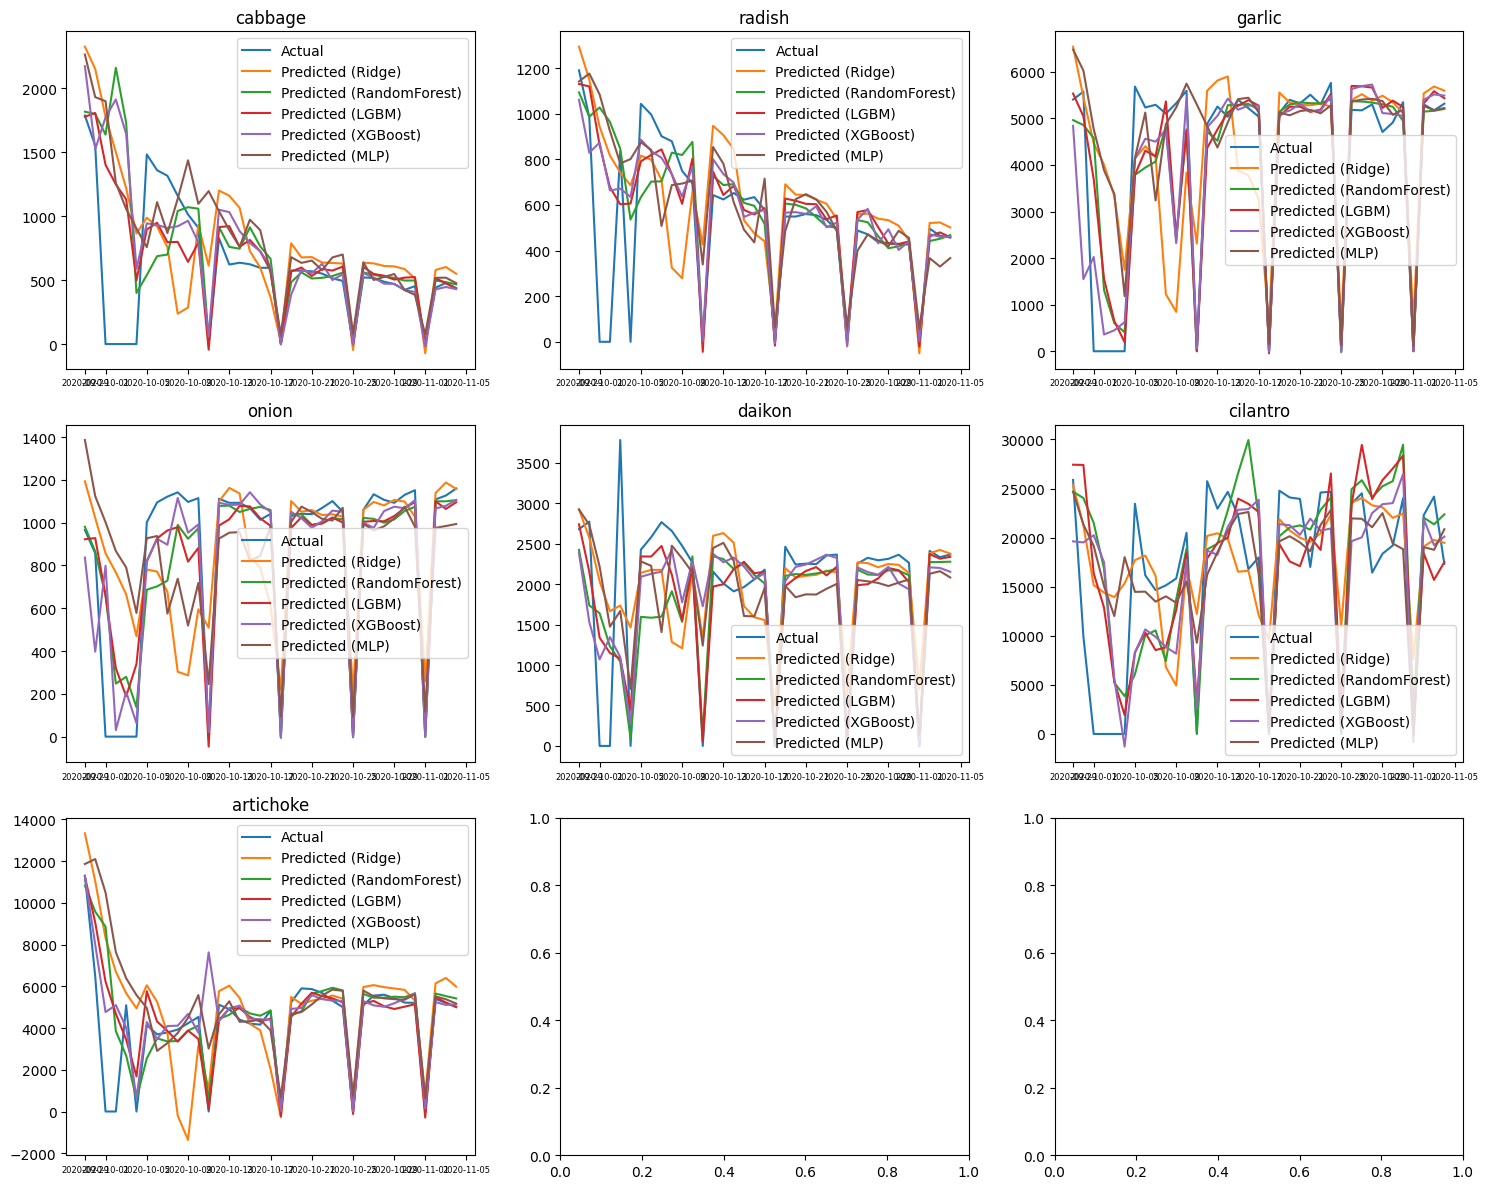

In [116]:
plot_predictions(test_data_predictions, targets)

In [117]:
def apply_post_processing(test_data, targets):
    """
    post-processing
    args:
        test_data,
        targets
    return:
        test_data
    """
    holidays = ['2020-10-01', '2020-10-03']
    test_data['day'] = test_data['date'].dt.dayofweek
    test_data['holiday'] = test_data['date'].isin(holidays).astype(int)
    test_data['is_flag'] = np.where((test_data['day'] == 6) | (test_data['holiday'] == 1), 1, 0)

    for target in targets:
        for model_name in test_data.columns:
            if target+'_pred_' in model_name:
                test_data[model_name] = np.where(test_data['is_flag'] == 0, test_data[model_name], 0)

    return test_data

In [118]:
test_data_predictions = create_predictions_df(test_data, predictions, targets)

In [119]:
test_data_predictions_post = apply_post_processing(test_data_predictions, targets)

In [120]:
test_data_predictions_post.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,artichoke_pred_XGBoost,cabbage_pred_MLP,radish_pred_MLP,garlic_pred_MLP,onion_pred_MLP,daikon_pred_MLP,cilantro_pred_MLP,artichoke_pred_MLP,holiday,is_flag
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,11263.524414,2263.645778,1141.198634,6477.417382,1386.628779,2923.348945,24666.076097,11856.588873,0,0
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,7996.165039,1930.874195,1175.675713,6027.528623,1123.568996,2735.713628,21336.557954,12092.446694,0,0
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,5095.951660,1259.136114,923.747248,3886.912624,867.546370,1474.571618,15050.454592,7636.550552,0,0
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1


In [121]:
metrics_post = evaluate_predictions(test_data_predictions_post, targets)
metrics_post[['product', 'model']] = metrics_post['product_model'].str.split('_', expand=True)

In [122]:
metrics_post.head()

,product_model,MdAPE,product,model
0,cabbage_Ridge,0.702017,cabbage,Ridge
1,cabbage_RandomForest,0.888084,cabbage,RandomForest
2,cabbage_LGBM,0.843261,cabbage,LGBM
3,cabbage_XGBoost,0.897584,cabbage,XGBoost
4,cabbage_MLP,0.810390,cabbage,MLP


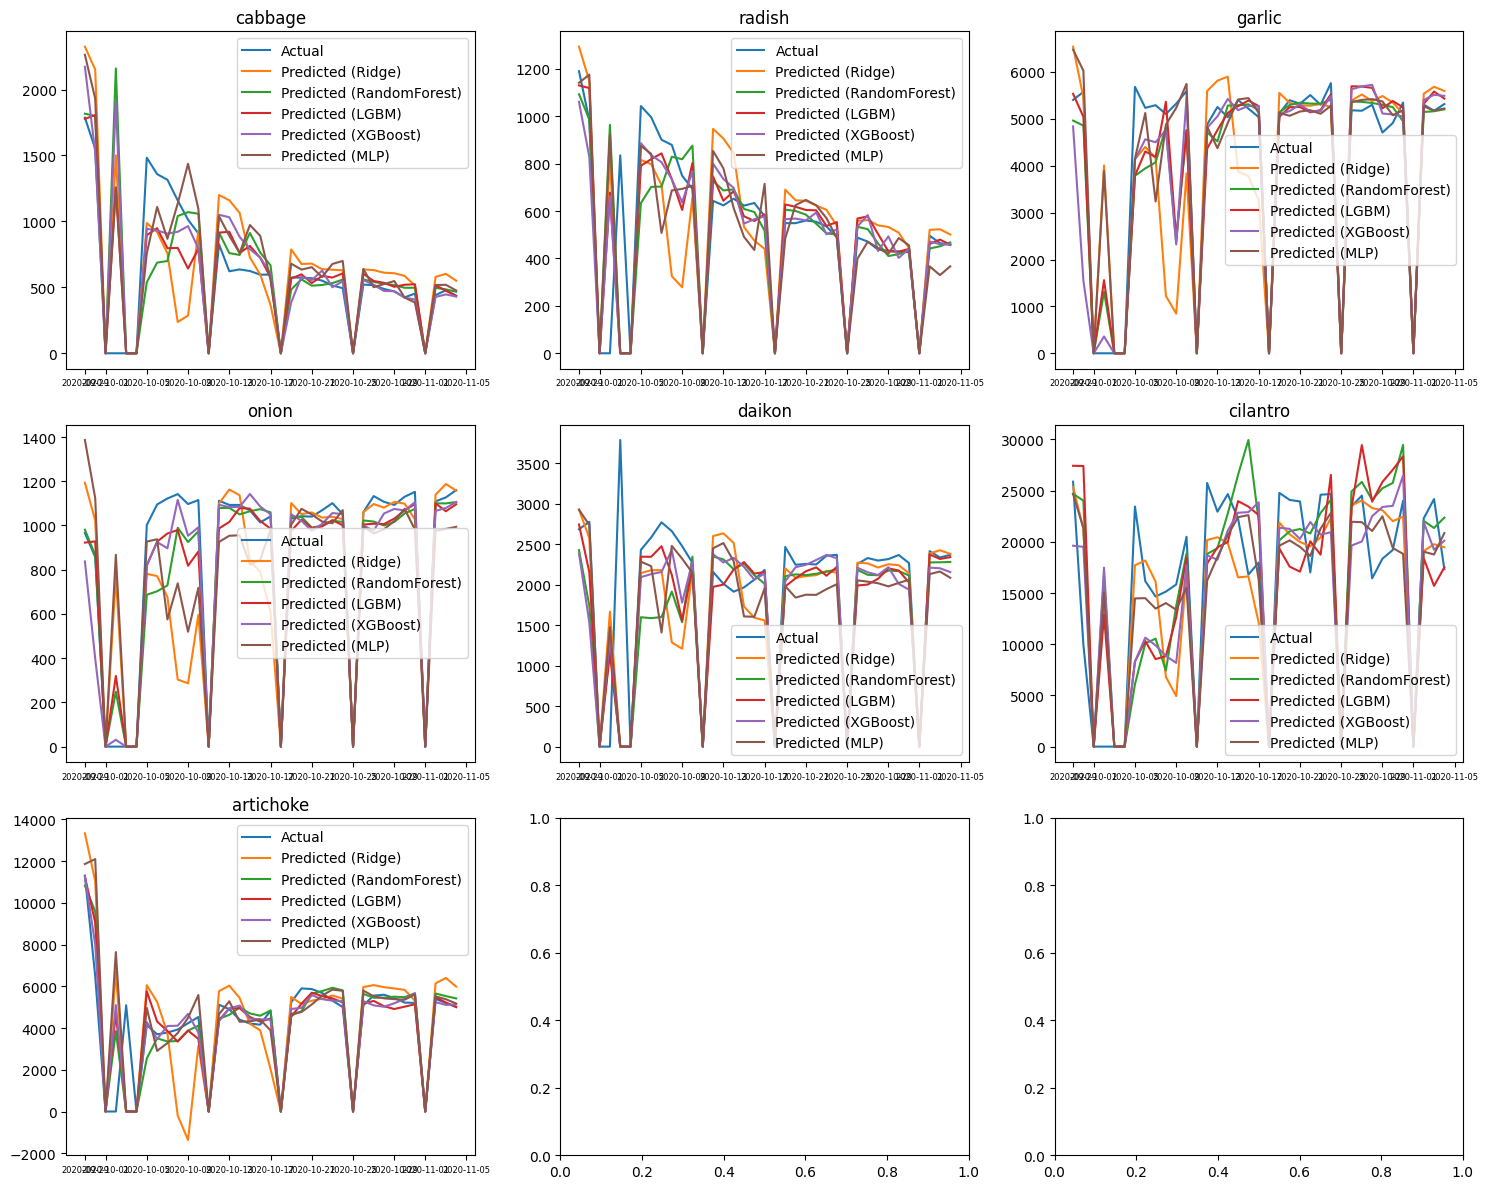

In [123]:
plot_predictions(test_data_predictions_post, targets)

In [124]:
def plot_mdape_compare(metrics_post):

    products = metrics_post['product'].unique()
    num_products = len(products)

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharex=False, sharey=True)
    for i, product in enumerate(products):
        row = i // 3
        col = i % 3
        product_data = metrics_post[metrics_post['product'] == product]

        ax = axes[row, col]
        ax.bar(product_data['model'], product_data['MdAPE'])
        ax.set_title(product)
        ax.set_ylabel('MdAPE')
        ax.set_ylim(0.5, 1)
        ax.tick_params(axis='x')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

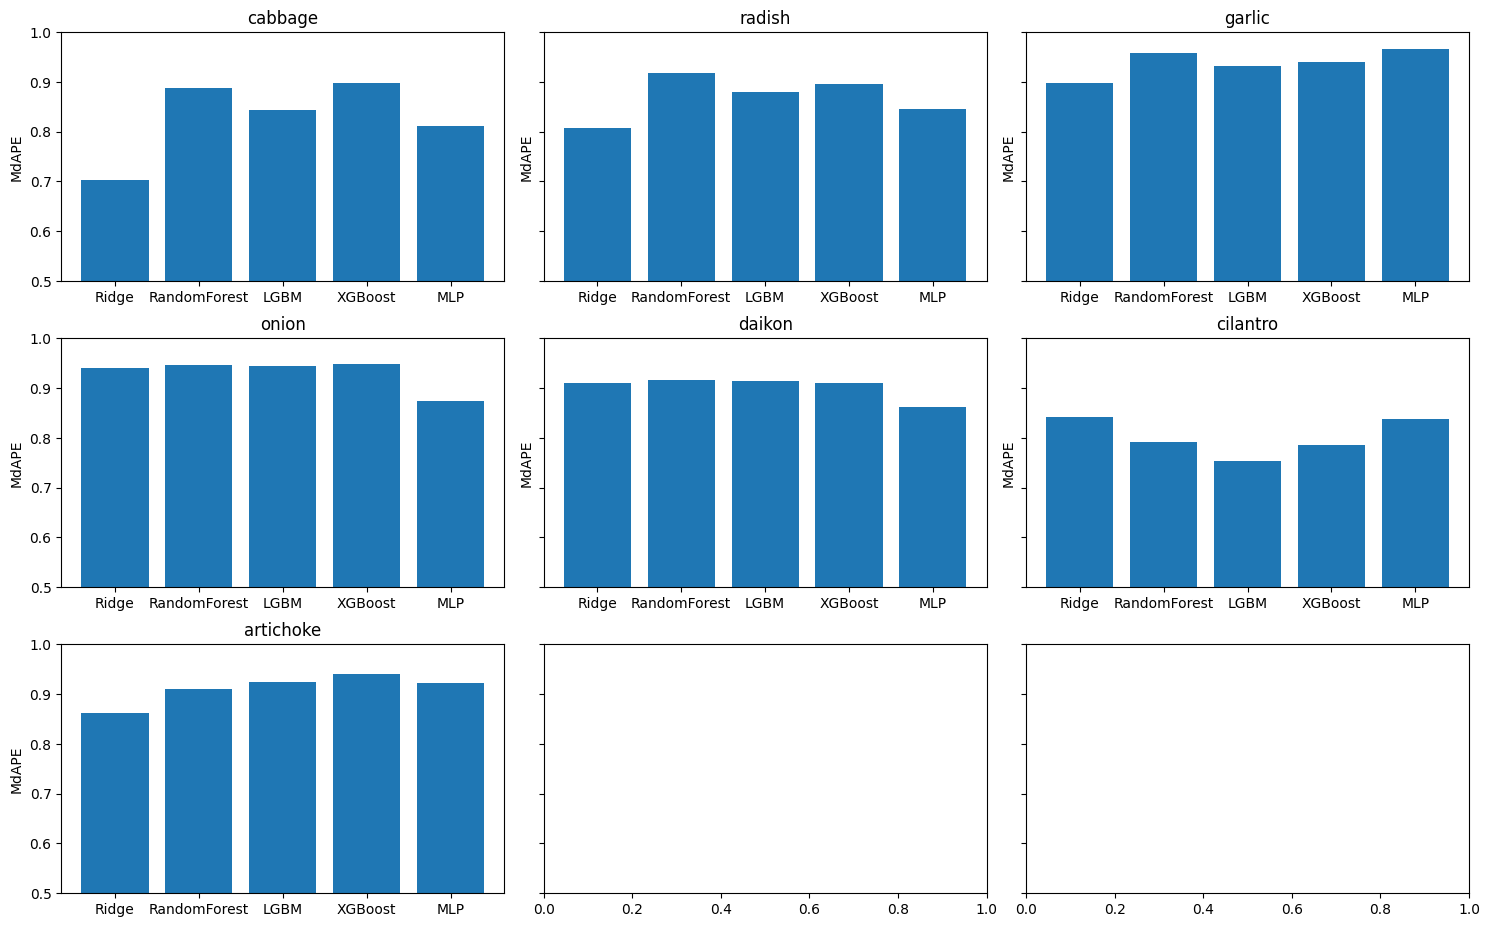

In [125]:
plot_mdape_compare(metrics_post)

In [126]:
metrics_post.pivot(index='product', columns='model', values='MdAPE').round(5)

model,LGBM,MLP,RandomForest,Ridge,XGBoost
product,,,,,
artichoke,0.92451,0.92201,0.90916,0.86274,0.93962
cabbage,0.84326,0.81039,0.88808,0.70202,0.89758
cilantro,0.75246,0.83679,0.79172,0.84229,0.78540
daikon,0.91438,0.86252,0.91609,0.90886,0.91011
garlic,0.93251,0.96591,0.95695,0.89710,0.94075
onion,0.94393,0.87298,0.94646,0.94004,0.94856
radish,0.88048,0.84461,0.91853,0.80715,0.89488


In [127]:
metrics.pivot(index='product', columns='model', values='MdAPE').round(5)

model,LGBM,MLP,RandomForest,Ridge,XGBoost
product,,,,,
artichoke,0.90341,0.89399,0.89593,0.82052,0.91780
cabbage,0.80280,0.75508,0.87141,0.66618,0.79485
cilantro,0.69467,0.79614,0.75188,0.81766,0.72490
daikon,0.89526,0.84688,0.91155,0.88230,0.87119
garlic,0.90485,0.95580,0.94591,0.83455,0.92276
onion,0.92952,0.85206,0.93443,0.80714,0.93836
radish,0.86280,0.81730,0.91853,0.78840,0.89142


## Feature Importance Check

In [130]:
#pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.4 MB/s eta 0:00:00


In [131]:
import shap

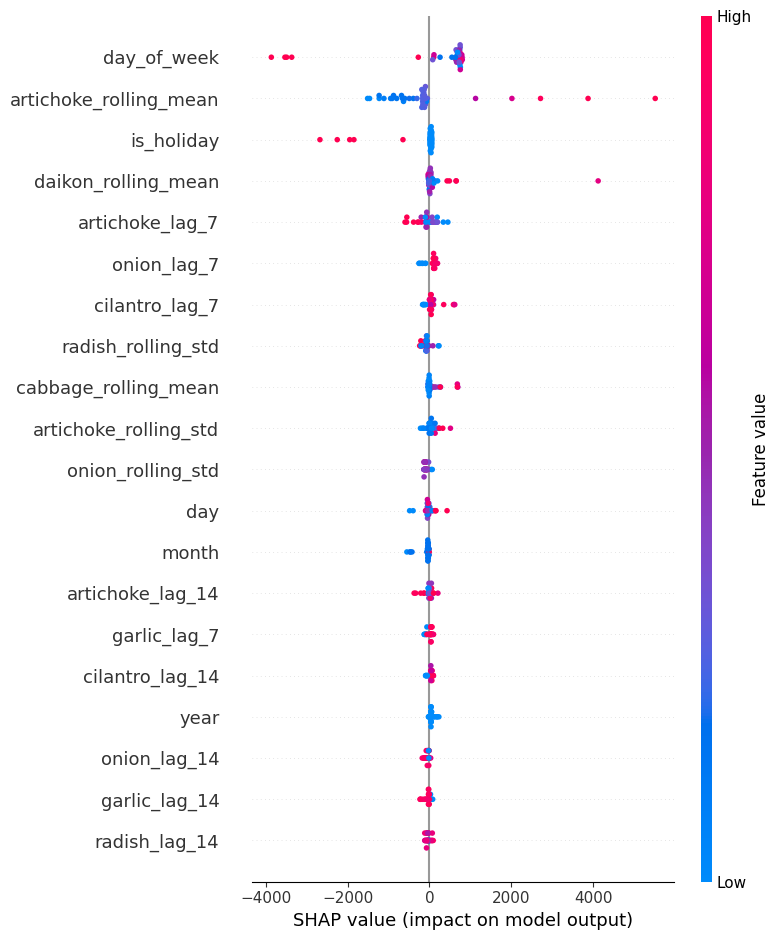

In [132]:
target = 'artichoke'
model = XGBRegressor().fit(train_data[features], train_data[target])

explainer = shap.Explainer(model, train_data[features])
shap_values = explainer(test_data[features])
shap.summary_plot(shap_values, test_data[features], title="SHAP Summary Plot for 'cabbage'")

# 3강. 모델 성능 고도화

- 앙상블 모델
    - Average Model: 여러 모델의 예측값을 가중평균하여 예측
        - Reduced Variance: Averaging predictions from multiple models can help reduce variance and improve robustness, especially when individual models may have different biases or variance.
        - Simplicity: It's easy to implement and understand, making it a good starting point for ensemble learning.

    - Stacking model : 여러 모델의 예측값을 피처로 활용하여 재예측
        - Improved Performance: Stacking can often outperform simple averaging by learning to effectively combine the strengths of different models.
        - Model Integration: It explicitly models the relationships between the base models' predictions, which can lead to better generalization.



## Voting Regressor (Average)

In [133]:
# 하이브리드용 모델 선언: 성능이 높은 모델 위주로
models = {
#    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
#    'MLP': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
}
models

{'RandomForest': RandomForestRegressor(),
 'LGBM': LGBMRegressor(),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)}

In [134]:
def train_models_avg(train_data, targets, features, models):
    """
    학습 데이터셋을 받아서 모델별로 반복하여 학습 진행하고 예측값 반환 -> 평균
    args:
        train_data,
        targets,
        features,
        models
    return:
        predictions
    """
    predictions = {model_name: {} for model_name in models}
    for model_name, model in models.items():
        for target in targets:
            model.fit(train_data[features], train_data[target])
            predictions[model_name][target] = model.predict(test_data[features])

    average_predictions = {}
    for target in targets:
        all_model_preds = np.array([predictions[model_name][target] for model_name in models])
        average_predictions[target] = np.mean(all_model_preds, axis=0)

    return average_predictions

In [135]:
average_predictions = train_models_avg(train_data, targets, features, models)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 599.280396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 492.411867
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start tr

In [136]:
average_predictions

{'cabbage': array([ 1.91755528e+03,  1.70380988e+03,  1.60246600e+03,  1.73158009e+03,
         1.54499070e+03,  4.98812876e+02,  8.05836777e+02,  8.45003218e+02,
         7.85691605e+02,  9.29597655e+02,  8.85711798e+02,  8.78107043e+02,
         5.19528161e+00,  9.62987639e+02,  8.98583185e+02,  8.10342584e+02,
         8.37970774e+02,  7.15847824e+02,  6.03764255e+02,  2.24529703e+00,
         4.90371278e+02,  6.00508896e+02,  5.49970130e+02,  5.97027832e+02,
         5.44440247e+02,  5.77383605e+02, -1.58078359e+00,  5.70714134e+02,
         5.32620820e+02,  5.11508225e+02,  4.96566452e+02,  4.82268503e+02,
         4.78296928e+02, -9.02906611e+00,  4.81946767e+02,  4.69157685e+02,
         4.43596171e+02]),
 'radish': array([1087.83530466,  962.86754921,  911.00737454,  764.96115729,
         719.80111167,  574.32831409,  763.17749542,  764.15789734,
         761.59925732,  756.69605714,  682.9231035 ,  780.59242015,
         -13.37328062,  753.72518612,  671.11980589,  689.667486

In [137]:
average_predictions['cabbage'].astype(int)

array([1917, 1703, 1602, 1731, 1544,  498,  805,  845,  785,  929,  885,
        878,    5,  962,  898,  810,  837,  715,  603,    2,  490,  600,
        549,  597,  544,  577,   -1,  570,  532,  511,  496,  482,  478,
         -9,  481,  469,  443])

In [138]:
def create_predictions_df_avg(test_data, predictions, targets):
    """
    테스트셋에 대한 예측값을 데이터프레임으로 생성
    args:
        test_data,
        predictions,
        targets
    return:
        test_data_predictions
    """
    # 예측값을 데이터프레임으로 변환
    test_data_predictions = test_data.copy()
    for target in targets:
        test_data_predictions[f'{target}_pred_average'] = predictions[target]

    return test_data_predictions

In [139]:
test_data_predictions_avg = create_predictions_df_avg(test_data, average_predictions, targets)

In [140]:
test_data_predictions_avg.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std,cabbage_pred_average,radish_pred_average,garlic_pred_average,onion_pred_average,daikon_pred_average,cilantro_pred_average,artichoke_pred_average
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,2025.475335,10881.428571,778.741904,1917.555280,1087.835305,5087.470872,913.459042,2502.509123,24228.838754,11100.849204
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,5143.887528,10384.142857,1846.655303,1703.809878,962.867549,3779.279045,740.230339,1759.968963,23664.592955,8847.129752
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,9419.550379,8951.571429,4355.046378,1602.466004,911.007375,3489.594944,719.524251,1320.195269,19596.234927,6760.662090
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,11200.008091,7391.428571,5369.857784,1731.580091,764.961157,1197.435897,221.877165,1244.052506,14795.773332,4491.857055
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,11788.771041,6603.428571,5222.031848,1544.990695,719.801112,636.179046,229.102198,1062.715968,5663.589414,3488.725689


In [141]:
# post_processing
test_data_predictions_post_avg = apply_post_processing(test_data_predictions_avg, targets)

In [142]:
test_data_predictions_post_avg.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,artichoke_rolling_std,cabbage_pred_average,radish_pred_average,garlic_pred_average,onion_pred_average,daikon_pred_average,cilantro_pred_average,artichoke_pred_average,holiday,is_flag
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,778.741904,1917.555280,1087.835305,5087.470872,913.459042,2502.509123,24228.838754,11100.849204,0,0
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,1846.655303,1703.809878,962.867549,3779.279045,740.230339,1759.968963,23664.592955,8847.129752,0,0
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,4355.046378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,5369.857784,1731.580091,764.961157,1197.435897,221.877165,1244.052506,14795.773332,4491.857055,0,0
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,5222.031848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1


In [143]:
test_data_predictions_post.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,cilantro_APE_Ridge,cilantro_APE_RandomForest,cilantro_APE_LGBM,cilantro_APE_XGBoost,cilantro_APE_MLP,artichoke_APE_Ridge,artichoke_APE_RandomForest,artichoke_APE_LGBM,artichoke_APE_XGBoost,artichoke_APE_MLP
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,0.019813,0.045999,0.060012,0.241681,0.046648,0.179480,0.042181,0.004597,0.003051,0.049441
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,1.140874,1.419890,1.760025,0.965027,1.148913,0.704137,0.478905,0.398555,0.234738,0.867271
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
# get metrics
metrics_post_avg = evaluate_predictions(test_data_predictions_post_avg, targets)
metrics_post_avg[['product', 'model']] = metrics_post_avg['product_model'].str.split('_', expand=True)

In [145]:
metrics_post_avg

,product_model,MdAPE,product,model
0,cabbage_average,0.903028,cabbage,average
1,radish_average,0.918668,radish,average
2,garlic_average,0.945294,garlic,average
3,onion_average,0.945410,onion,average
4,daikon_average,0.923245,daikon,average
5,cilantro_average,0.798300,cilantro,average
6,artichoke_average,0.943788,artichoke,average


In [146]:
metrics_post.head()

,product_model,MdAPE,product,model
0,cabbage_Ridge,0.702017,cabbage,Ridge
1,cabbage_RandomForest,0.888084,cabbage,RandomForest
2,cabbage_LGBM,0.843261,cabbage,LGBM
3,cabbage_XGBoost,0.897584,cabbage,XGBoost
4,cabbage_MLP,0.810390,cabbage,MLP


In [147]:
pd.concat([metrics_post, metrics_post_avg])\
  .pivot(index='product', columns='model', values='MdAPE').round(5)

model,LGBM,MLP,RandomForest,Ridge,XGBoost,average
product,,,,,,
artichoke,0.92451,0.92201,0.90916,0.86274,0.93962,0.94379
cabbage,0.84326,0.81039,0.88808,0.70202,0.89758,0.90303
cilantro,0.75246,0.83679,0.79172,0.84229,0.78540,0.79830
daikon,0.91438,0.86252,0.91609,0.90886,0.91011,0.92324
garlic,0.93251,0.96591,0.95695,0.89710,0.94075,0.94529
onion,0.94393,0.87298,0.94646,0.94004,0.94856,0.94541
radish,0.88048,0.84461,0.91853,0.80715,0.89488,0.91867


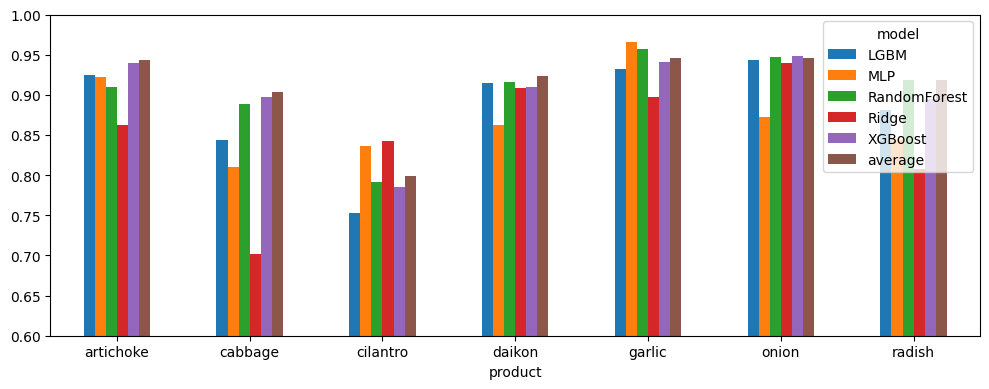

In [148]:
pd.concat([metrics_post, metrics_post_avg])\
  .pivot(index='product', columns='model', values='MdAPE').round(5)\
  .plot(kind='bar', figsize=(10,4), rot=0)

plt.ylim(0.6, 1)
plt.tight_layout()

## Stacking Regressor

In [149]:
from sklearn.ensemble import StackingRegressor

In [150]:
predictions_stack = {}
base_regressors = [
                ('rf', RandomForestRegressor(random_state=42)),
                ('lgbm', LGBMRegressor(random_state=42)),
                ('xgb', XGBRegressor(random_state=42))
                ]

stacking_regressor = StackingRegressor(estimators=base_regressors,
                                        final_estimator=XGBRegressor()
                                        )
stacking_regressor

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('lgbm', LGBMRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gam...
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...))

In [151]:
for target in targets:
    stacking_regressor.fit(train_data[features], train_data[target])
    predictions_stack[target] = stacking_regressor.predict(test_data[features])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 599.280396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1375, number of used features: 34
[LightGBM] [Info] Start training from score 569.157091
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

In [152]:
predictions_stack['cabbage'].astype(int)

array([1577, 1547,  977, 1584, 1558,  540,  538,  817,  563,  751,  806,
        411,    0,  772,  859,  842,  730,  743,  588,    0,  522,  571,
        559,  583,  516,  532,    0,  530,  498,  483,  513,  494,  482,
          0,  507,  477,  437])

In [153]:
def create_predictions_df_stack(test_data, predictions, targets):
    """
    테스트셋에 대한 예측값을 데이터프레임으로 생성
    args:
        test_data,
        predictions,
        targets
    return:
        test_data_predictions
    """
    # 예측값을 데이터프레임으로 변환
    test_data_predictions = test_data.copy()
    for target in targets:
        test_data_predictions[f'{target}_pred_stack'] = predictions[target]

    return test_data_predictions

In [154]:
test_data_predictions_stack = create_predictions_df_stack(test_data, predictions_stack, targets)

# post-processing
test_data_predictions_post_stack = apply_post_processing(test_data_predictions_stack, targets)

In [155]:
test_data_predictions_post_stack.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,artichoke_rolling_std,cabbage_pred_stack,radish_pred_stack,garlic_pred_stack,onion_pred_stack,daikon_pred_stack,cilantro_pred_stack,artichoke_pred_stack,holiday,is_flag
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,778.741904,1577.642212,1055.127197,5162.010742,1060.986938,2190.569580,31206.882812,7804.586914,0,0
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,1846.655303,1547.950928,1078.751587,4275.458984,1105.788940,1708.415894,31592.390625,9785.332031,0,0
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,4355.046378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,5369.857784,1584.639893,967.955261,2.730137,-17.973873,1533.314697,19287.142578,3681.718262,0,0
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,5222.031848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1


In [156]:
# get metrics
metrics_post_stack = evaluate_predictions(test_data_predictions_post_stack, targets)
metrics_post_stack[['product', 'model']] = metrics_post_stack['product_model'].str.split('_', expand=True)

In [157]:
metrics_post_stack

,product_model,MdAPE,product,model
0,cabbage_stack,0.906148,cabbage,stack
1,radish_stack,0.892248,radish,stack
2,garlic_stack,0.950768,garlic,stack
3,onion_stack,0.941105,onion,stack
4,daikon_stack,0.881155,daikon,stack
5,cilantro_stack,0.724400,cilantro,stack
6,artichoke_stack,0.923352,artichoke,stack


In [158]:
pd.concat([metrics_post, metrics_post_avg, metrics_post_stack])\
  .pivot(index='product', columns='model', values='MdAPE').round(5)

model,LGBM,MLP,RandomForest,Ridge,XGBoost,average,stack
product,,,,,,,
artichoke,0.92451,0.92201,0.90916,0.86274,0.93962,0.94379,0.92335
cabbage,0.84326,0.81039,0.88808,0.70202,0.89758,0.90303,0.90615
cilantro,0.75246,0.83679,0.79172,0.84229,0.78540,0.79830,0.72440
daikon,0.91438,0.86252,0.91609,0.90886,0.91011,0.92324,0.88116
garlic,0.93251,0.96591,0.95695,0.89710,0.94075,0.94529,0.95077
onion,0.94393,0.87298,0.94646,0.94004,0.94856,0.94541,0.94110
radish,0.88048,0.84461,0.91853,0.80715,0.89488,0.91867,0.89225


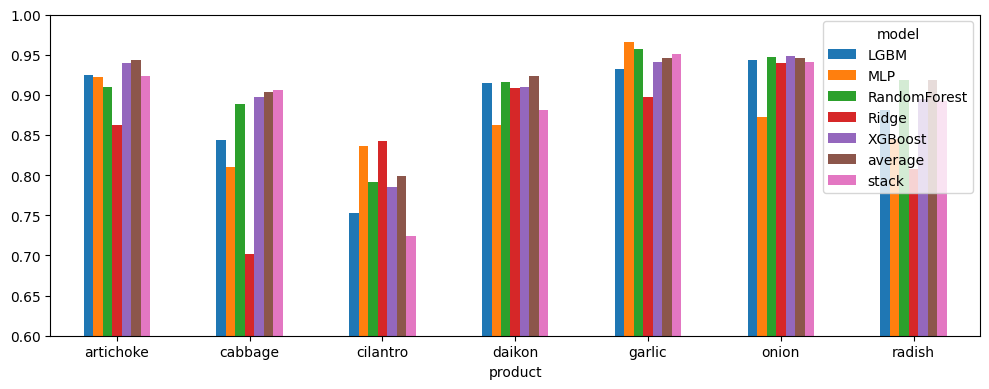

In [159]:
import matplotlib.pyplot as plt

pd.concat([metrics_post, metrics_post_avg, metrics_post_stack])\
  .pivot(index='product', columns='model', values='MdAPE').round(5)\
  .plot(kind='bar', figsize=(10,4), rot=0)

plt.ylim(0.6, 1)
plt.tight_layout()

## Deep Learning with Pytorch
- MLP Regressor 보다 복잡한 구조 테스트
- 예를 들어, Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN),
- Long Short-Term Memory Networks (LSTM), Gated Recurrent Unit (GRU), Transformer Models

In [160]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import numpy as np

In [161]:
# Features and targets
target_columns = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
features = [col for col in train_data.columns if col not in ['date'] + target_columns]

# Normalizing the feature columns
scaler = StandardScaler()
train_data[features] = scaler.fit_transform(train_data[features])
test_data[features] = scaler.transform(test_data[features])

class MyDataset(Dataset):
    def __init__(self, data, target_columns, feature_columns):
        self.features = torch.tensor(data[feature_columns].values, dtype=torch.float32)
        self.targets = torch.tensor(data[target_columns].values, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Create train and test datasets
train_dataset = MyDataset(train_data, target_columns, features)
test_dataset = MyDataset(test_data, target_columns, features)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

class ImprovedFCNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.2):
        super(ImprovedFCNNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate the model
input_dim = len(features)
hidden_dim = 128
output_dim = len(target_columns)
dropout_rate = 0.3

model = ImprovedFCNNModel(input_dim, hidden_dim, output_dim, dropout_rate)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
early_stopping_patience = 10
best_loss = float('inf')
epochs_no_improve = 0

# Training loop
num_epochs = 500  # Adjust the number of epochs as needed
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Evaluate on the test set
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            total_loss += criterion(outputs, targets).item()

    avg_loss = total_loss / len(test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Test Loss: {avg_loss}")

    # Check for early stopping
    if avg_loss < best_loss:
        best_loss = avg_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pt'))


Epoch 1/500, Test Loss: 57313500.0
Epoch 2/500, Test Loss: 57033168.0
Epoch 3/500, Test Loss: 55863848.0
Epoch 4/500, Test Loss: 52895492.0
Epoch 5/500, Test Loss: 47911080.0
Epoch 6/500, Test Loss: 41992068.0
Epoch 7/500, Test Loss: 36294484.0
Epoch 8/500, Test Loss: 33078922.0
Epoch 9/500, Test Loss: 32032402.0
Epoch 10/500, Test Loss: 31281124.0
Epoch 11/500, Test Loss: 29305110.0
Epoch 12/500, Test Loss: 27917846.0
Epoch 13/500, Test Loss: 26833202.0
Epoch 14/500, Test Loss: 25074830.0
Epoch 15/500, Test Loss: 24144610.0
Epoch 16/500, Test Loss: 22274472.0
Epoch 17/500, Test Loss: 21556386.0
Epoch 18/500, Test Loss: 20734814.0
Epoch 19/500, Test Loss: 20077778.0
Epoch 20/500, Test Loss: 19514070.0
Epoch 21/500, Test Loss: 18875934.0
Epoch 22/500, Test Loss: 18790192.0
Epoch 23/500, Test Loss: 18301912.0
Epoch 24/500, Test Loss: 18354640.0
Epoch 25/500, Test Loss: 18121100.0
Epoch 26/500, Test Loss: 17675270.0
Epoch 27/500, Test Loss: 17680268.0
Epoch 28/500, Test Loss: 17477202.0
E

<All keys matched successfully>

In [162]:
# Generate predictions
model.eval()
predictions = {target: [] for target in target_columns}
real_values = {target: [] for target in target_columns}

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        for i, target in enumerate(target_columns):
            predictions[target].extend(outputs[:, i].numpy())
            real_values[target].extend(targets[:, i].numpy())

# Convert predictions and real values into DataFrames for easier plotting
pred_df = pd.DataFrame(predictions)
real_df = pd.DataFrame(real_values)
date_series = test_data['date'].reset_index(drop=True)

# Add date to the DataFrames
pred_df['date'] = date_series
real_df['date'] = date_series

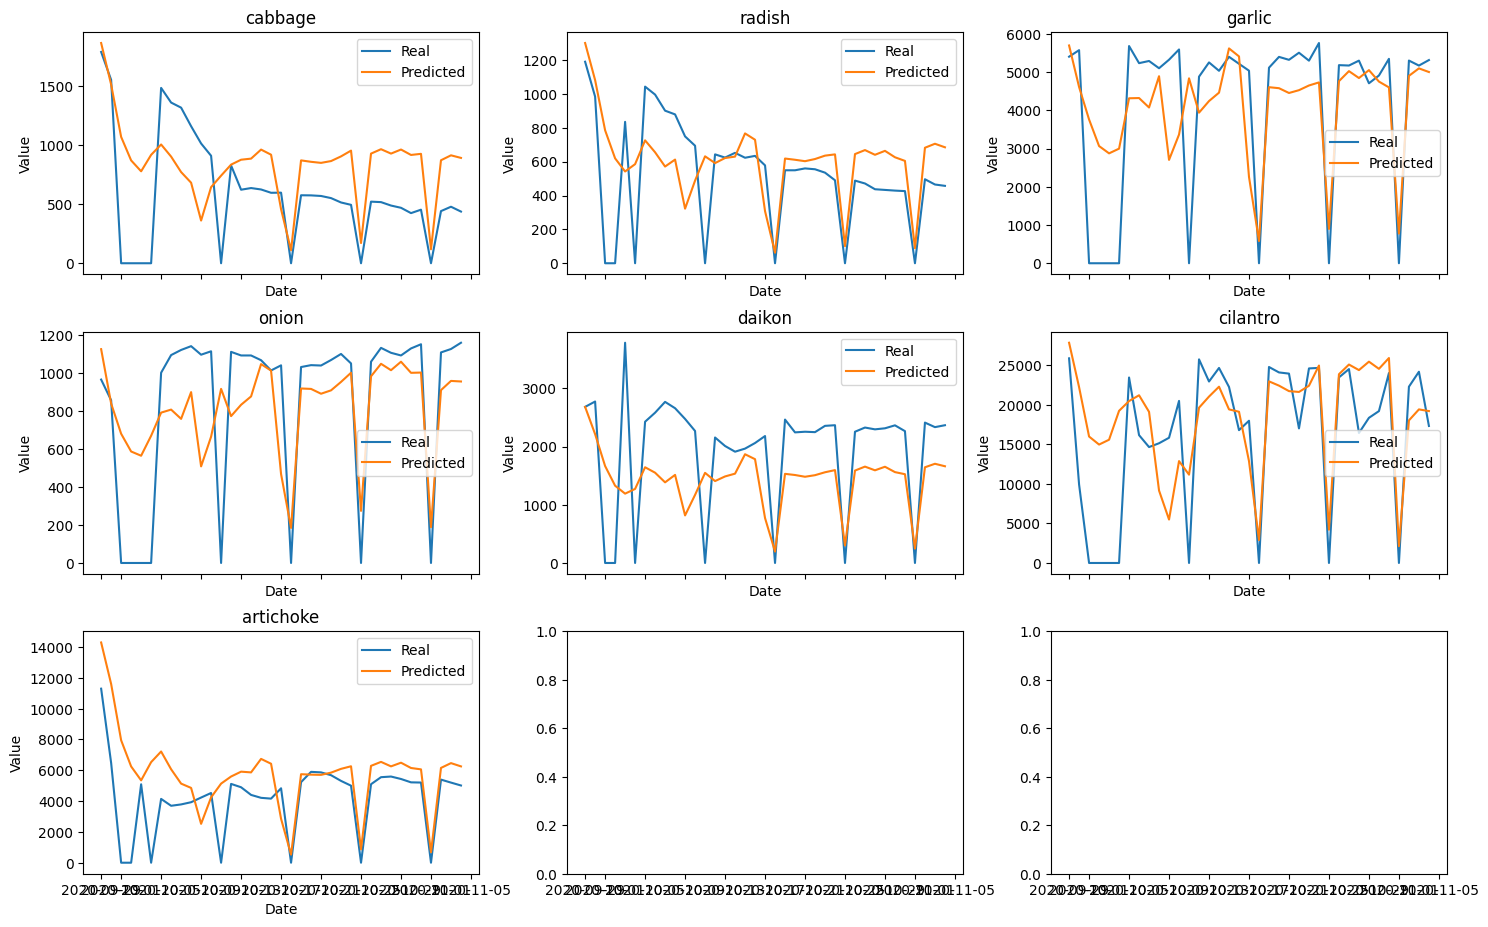

In [163]:
# Plot predictions vs. real values
def plot_predictions_vs_real(pred_df, real_df, targets):
    num_products = len(targets)
    num_cols = 3
    num_rows = (num_products + num_cols - 1) // num_cols

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)
    axes = axes.flatten()

    for i, target in enumerate(targets):
        ax = axes[i]
        ax.plot(real_df['date'], real_df[target], label='Real')
        ax.plot(pred_df['date'], pred_df[target], label='Predicted')
        ax.set_title(target)
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

plot_predictions_vs_real(pred_df, real_df, target_columns)

- NOTE
- Tabular dataset 에 딥러닝은 적절하지 않은 경우가 많음
- 딥러닝은 데이터양이 엄청나게 많고 비정형(이미지, 텍스트 등) 데이터에서 높은 성능을 주로 보임
- 딥러닝은 연산량이 많고 시간이 오래걸리며, 유지보수가 어렵고 GPU장비가 필수 등 제약점이 많아 실전 예측 문제에서 잘 사용하지 않음
- 딥러닝은 LLM, 이미지 등 GenAI 모델을 개발하는 경우 등 특정 TASK에 적용하는 추세

# 4강. 포트폴리오 구축 with Streamlit
- https://streamlit.io/
- frontend 구축하고 예측모델 어플리케이션을 배포
- 주요 기능: 상품 선택, 날짜 및 모델 선택 등을 유저가 하면 예측 트렌드를 보여주는 앱

## Streamlit 대시보드 초안

In [164]:
data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
targets = target_columns

In [174]:
real = data.set_index("date")[targets].reset_index()
real

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,329.0,360.0,5475.0,1281.0,1704.0,11000.0,13242.0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,478.0,382.0,5210.0,1235.0,1716.0,4464.0,9923.0
4,2016-01-05,442.0,422.0,5387.0,1213.0,1715.0,4342.0,9529.0
...,...,...,...,...,...,...,...,...
1765,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0
1766,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1767,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0
1768,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0


In [175]:
test_data_predictions_post.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,cilantro_APE_Ridge,cilantro_APE_RandomForest,cilantro_APE_LGBM,cilantro_APE_XGBoost,cilantro_APE_MLP,artichoke_APE_Ridge,artichoke_APE_RandomForest,artichoke_APE_LGBM,artichoke_APE_XGBoost,artichoke_APE_MLP
1733,2020-09-29,1787.0,1190.0,5404.0,966.0,2682.0,25873.0,11298.0,2020,9,...,0.019813,0.045999,0.060012,0.241681,0.046648,0.179480,0.042181,0.004597,0.003051,0.049441
1734,2020-09-30,1551.0,984.0,5575.0,857.0,2774.0,9929.0,6476.0,2020,9,...,1.140874,1.419890,1.760025,0.965027,1.148913,0.704137,0.478905,0.398555,0.234738,0.867271
1735,2020-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,2020-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1737,2020-10-03,0.0,835.0,0.0,0.0,3784.0,0.0,5091.0,2020,10,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


In [176]:
pred_cols = [col for col in test_data_predictions_post.columns if 'pred' in col or 'date' in col]
pred_cols_avg = [col for col in test_data_predictions_post_avg.columns if 'pred' in col or 'date' in col]
pred_cols_stack = [col for col in test_data_predictions_post_stack.columns if 'pred' in col or 'date' in col]

In [177]:
pred_cols_stack

['date',
 'cabbage_pred_stack',
 'radish_pred_stack',
 'garlic_pred_stack',
 'onion_pred_stack',
 'daikon_pred_stack',
 'cilantro_pred_stack',
 'artichoke_pred_stack']

In [178]:
pred = test_data_predictions_post[pred_cols]
pred_avg = test_data_predictions_post_avg[pred_cols_avg]
pred_stack = test_data_predictions_post_stack[pred_cols_stack]

In [179]:
pred_avg.head()

,date,cabbage_pred_average,radish_pred_average,garlic_pred_average,onion_pred_average,daikon_pred_average,cilantro_pred_average,artichoke_pred_average
1733,2020-09-29,1917.555280,1087.835305,5087.470872,913.459042,2502.509123,24228.838754,11100.849204
1734,2020-09-30,1703.809878,962.867549,3779.279045,740.230339,1759.968963,23664.592955,8847.129752
1735,2020-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1736,2020-10-02,1731.580091,764.961157,1197.435897,221.877165,1244.052506,14795.773332,4491.857055
1737,2020-10-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [180]:
real = real.merge(pred, on='date', how='left')\
           .merge(pred_avg, on='date', how='left')\
           .merge(pred_stack, on='date', how='left')

In [181]:
real.tail()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,cabbage_pred_Ridge,radish_pred_Ridge,...,daikon_pred_average,cilantro_pred_average,artichoke_pred_average,cabbage_pred_stack,radish_pred_stack,garlic_pred_stack,onion_pred_stack,daikon_pred_stack,cilantro_pred_stack,artichoke_pred_stack
1765,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0,513.722689,443.535349,...,2006.360395,28497.378100,5395.625885,482.082245,435.836700,5117.765137,1132.898071,1995.815308,18488.087891,5640.291504
1766,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1767,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0,579.208919,520.568444,...,2280.870858,22217.577406,5423.414628,507.295563,449.814758,5143.944336,1106.874023,2058.502686,15191.690430,5191.119141
1768,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0,602.498615,523.190346,...,2259.848533,20206.226759,5203.665636,477.301941,530.950134,5438.710449,998.149414,2163.634521,20016.302734,5203.370117
1769,2020-11-04,437.0,457.0,5316.0,1160.0,2367.0,17324.0,5013.0,550.397299,501.105125,...,2253.401277,21077.287648,5113.672709,437.734375,436.163330,5428.699219,1112.089233,2372.333252,18203.164062,5018.116211


In [182]:
real.columns

Index(['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro',
       'artichoke', 'cabbage_pred_Ridge', 'radish_pred_Ridge',
       'garlic_pred_Ridge', 'onion_pred_Ridge', 'daikon_pred_Ridge',
       'cilantro_pred_Ridge', 'artichoke_pred_Ridge',
       'cabbage_pred_RandomForest', 'radish_pred_RandomForest',
       'garlic_pred_RandomForest', 'onion_pred_RandomForest',
       'daikon_pred_RandomForest', 'cilantro_pred_RandomForest',
       'artichoke_pred_RandomForest', 'cabbage_pred_LGBM', 'radish_pred_LGBM',
       'garlic_pred_LGBM', 'onion_pred_LGBM', 'daikon_pred_LGBM',
       'cilantro_pred_LGBM', 'artichoke_pred_LGBM', 'cabbage_pred_XGBoost',
       'radish_pred_XGBoost', 'garlic_pred_XGBoost', 'onion_pred_XGBoost',
       'daikon_pred_XGBoost', 'cilantro_pred_XGBoost',
       'artichoke_pred_XGBoost', 'cabbage_pred_MLP', 'radish_pred_MLP',
       'garlic_pred_MLP', 'onion_pred_MLP', 'daikon_pred_MLP',
       'cilantro_pred_MLP', 'artichoke_pred_MLP', 'cabbage_p

In [183]:
real.shape

(1770, 57)

<Axes: xlabel='date'>

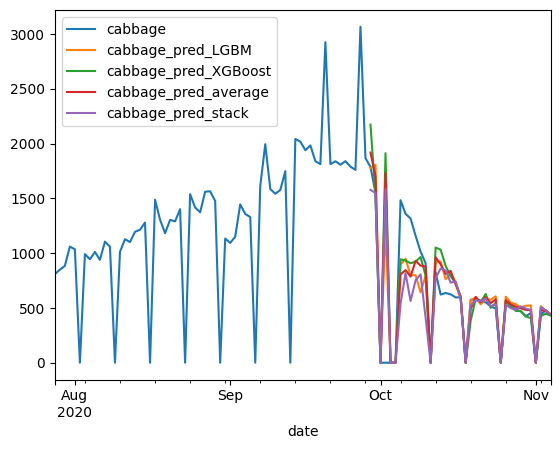

In [184]:
real[['date', 'cabbage', 'cabbage_pred_LGBM', 'cabbage_pred_XGBoost', 'cabbage_pred_average', 'cabbage_pred_stack']][-100:].set_index("date").plot()

In [185]:
real.shape

(1770, 57)

In [186]:
real.tail()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,cabbage_pred_Ridge,radish_pred_Ridge,...,daikon_pred_average,cilantro_pred_average,artichoke_pred_average,cabbage_pred_stack,radish_pred_stack,garlic_pred_stack,onion_pred_stack,daikon_pred_stack,cilantro_pred_stack,artichoke_pred_stack
1765,2020-10-31,453.0,426.0,5348.0,1152.0,2265.0,24013.0,5204.0,513.722689,443.535349,...,2006.360395,28497.378100,5395.625885,482.082245,435.836700,5117.765137,1132.898071,1995.815308,18488.087891,5640.291504
1766,2020-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1767,2020-11-02,441.0,496.0,5303.0,1109.0,2412.0,22287.0,5395.0,579.208919,520.568444,...,2280.870858,22217.577406,5423.414628,507.295563,449.814758,5143.944336,1106.874023,2058.502686,15191.690430,5191.119141
1768,2020-11-03,478.0,465.0,5172.0,1127.0,2334.0,24178.0,5201.0,602.498615,523.190346,...,2259.848533,20206.226759,5203.665636,477.301941,530.950134,5438.710449,998.149414,2163.634521,20016.302734,5203.370117
1769,2020-11-04,437.0,457.0,5316.0,1160.0,2367.0,17324.0,5013.0,550.397299,501.105125,...,2253.401277,21077.287648,5113.672709,437.734375,436.163330,5428.699219,1112.089233,2372.333252,18203.164062,5018.116211


In [187]:
file_path = '/content/drive/MyDrive/MetaCode/이커머스_예측모델_포폴/data/streamlit_data.csv'

real.to_csv(file_path, index=False)

In [188]:
metric_summay = pd.concat([metrics_post, metrics_post_avg, metrics_post_stack])\
  .pivot(index='product', columns='model', values='MdAPE').round(5).reset_index()

In [189]:
metric_summay

model,product,LGBM,MLP,RandomForest,Ridge,XGBoost,average,stack
0,artichoke,0.92451,0.92201,0.90916,0.86274,0.93962,0.94379,0.92335
1,cabbage,0.84326,0.81039,0.88808,0.70202,0.89758,0.90303,0.90615
2,cilantro,0.75246,0.83679,0.79172,0.84229,0.78540,0.79830,0.72440
3,daikon,0.91438,0.86252,0.91609,0.90886,0.91011,0.92324,0.88116
4,garlic,0.93251,0.96591,0.95695,0.89710,0.94075,0.94529,0.95077
5,onion,0.94393,0.87298,0.94646,0.94004,0.94856,0.94541,0.94110
6,radish,0.88048,0.84461,0.91853,0.80715,0.89488,0.91867,0.89225


In [190]:
file_path = '/content/drive/MyDrive/MetaCode/이커머스_예측모델_포폴/data/metric_summary.csv'

metric_summay.to_csv(file_path, index=False)

## Streamlit 대시보드 배포
- 아래 코드를 로컬에 저장하고 streamlit 으로 로컬서버로 띄우기
- 로컬에서 정상 작동하면 깃헙에 코드를 올리고 배포 진행

In [ ]:
#pip install streamlit

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_file_path = 'data/streamlit_data.csv'

@st.cache_data
def load_data(file_path):
    return pd.read_csv(file_path)

df = load_data(csv_file_path)

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
else:
    st.error("Date column not found in the CSV file.")

def preprocess_data(df):
    cutoff_date = pd.to_datetime('2020-09-28')
    cols_to_zero = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
    df.loc[df.index > cutoff_date, cols_to_zero] = np.nan
    return df

def plot_predictions_over_time(df, vegetables, rolling_mean_window):
    fig, ax = plt.subplots(figsize=(14, 7))

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    num_colors = len(colors)

    for i, veg in enumerate(vegetables):
        ax.plot(df.index, df[veg], label=veg, linewidth=2, color=colors[i % num_colors])
        rolling_mean = df[veg].rolling(window=rolling_mean_window).mean()
        ax.plot(df.index, rolling_mean, label=f'{veg} ({rolling_mean_window}-day Rolling Mean)', linestyle='--', color=colors[i % num_colors])

    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Price', fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True, color='lightgrey', linestyle='--')
    fig.tight_layout()
    st.pyplot(fig)


df = preprocess_data(df)

metric_file_path = 'data/metric_summary.csv'

metric_summary = pd.read_csv(metric_file_path)
metric_summary.set_index('product', inplace=True)

st.title('🍇농산물 가격 예측 대시보드🥭')
st.markdown("""
    왼쪽에서 품목과 예측모델, 날짜를 입력하면 특정기간 이후 예측 가격이 표시됩니다.
    """)

st.sidebar.title('조회 기간')
start_date = st.sidebar.date_input('시작일', df.index.min())
end_date = st.sidebar.date_input('마지막일', df.index.max())

st.sidebar.title('품목을 선택해주세요')
sorted_vegetables = sorted(df.columns)
vegetables = st.sidebar.multiselect('조회 품목:', sorted_vegetables)
rolling_mean_window = st.sidebar.slider('Rolling Mean Window', min_value=1, max_value=30, value=7)

filtered_df = df.loc[start_date:end_date]

if vegetables:
    st.subheader('품목별 예측 대시보드')
    plot_predictions_over_time(filtered_df, vegetables, rolling_mean_window)

if st.checkbox('Show Filtered DataFrame'):
    st.write(filtered_df)

st.subheader('정확도 Summary')
st.write(metric_summary)

https://docs.streamlit.io/

## 마무리

1. 데이터 탐색 EDA
  - EDA 통한 이해 및 시각화
  - 트렌드 분석, 히스토그램, 통계 및 상관분석
2. 베이스라인 모델 구축
  - Prophet
  - M/L 모델을 통한 베이스라인 성능 확인
  - 피처엔지니어링
  - Shap Value 피처 중요도 확인
3. 모델 성능 고도화
  - voting, stacking 모델 구축
  - deep learning
4. Streamlit 대시보드 구축
  - local 환경에서 개발
  - 실제 배포